In [1]:
!pip install torch matplotlib tqdm scikit-image nibabel graphviz torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [2]:
import os

for key, value in os.environ.items():
    print(f"{key}: {value}")

SHELL: /bin/bash
NV_LIBCUBLAS_VERSION: 12.5.3.2-1
NVIDIA_VISIBLE_DEVICES: all
COLAB_JUPYTER_TRANSPORT: ipc
NV_NVML_DEV_VERSION: 12.5.82-1
NV_CUDNN_PACKAGE_NAME: libcudnn9-cuda-12
CGROUP_MEMORY_EVENTS: /sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events
NV_LIBNCCL_DEV_PACKAGE: libnccl-dev=2.22.3-1+cuda12.5
NV_LIBNCCL_DEV_PACKAGE_VERSION: 2.22.3-1
VM_GCE_METADATA_HOST: 169.254.169.253
HOSTNAME: 89bfc6b21a4b
LANGUAGE: en_US
TBE_RUNTIME_ADDR: 172.28.0.1:8011
COLAB_TPU_1VM: 
GCE_METADATA_TIMEOUT: 3
NVIDIA_REQUIRE_CUDA: cuda>=12.5 brand=unknown,driver>=470,driver<471 brand=grid,driver>=470,driver<471 brand=tesla,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=vapps,driver>=470,driver<471 brand=vpc,driver>=470,driver<471 brand=vcs,driver>=470,driver<471 brand=vws,driver>=470,driver<471 brand=cloudgaming,driver>=470,driver<471 brand=unknow

In [3]:
import os

# Check if the tar file exists
if not os.path.exists('Task01_BrainTumour.tar'):
    print("Dataset not found locally, downloading now...")
    !wget -q https://msd-for-monai.s3-us-west-2.amazonaws.com/Task01_BrainTumour.tar -O Task01_BrainTumour.tar # silently downloads a .tar archive containing the Brain Tumour dataset.
    print("Download complete!")
else:
    print("Dataset archive already exists, skipping download.")

# Extract the dataset
if not os.path.exists('Task01_BrainTumour'):
    print("Extracting the dataset...")
    !tar -xf Task01_BrainTumour.tar # decompresses and unpacks the .tar file into the current directory, resulting in a folder named Task01_BrainTumour.
    print("Extraction complete!")
else:
    print("Dataset folder already exists, skipping extraction.")

print("Verifying the contents of the Task01_BrainTumour directory:")
!ls Task01_BrainTumour # displays the files or subfolders inside that directory

# # Clean up the tar file
# !rm Task01_BrainTumour.tar
# print("Cleaned up the tar file after extraction!")

# Install and use tree to visualize directory structure
# !brew install tree
!tree Task01_BrainTumour -L 2


Dataset not found locally, downloading now...
Download complete!
Extracting the dataset...
Extraction complete!
Verifying the contents of the Task01_BrainTumour directory:
dataset.json  imagesTr	imagesTs  labelsTr
/bin/bash: line 1: tree: command not found


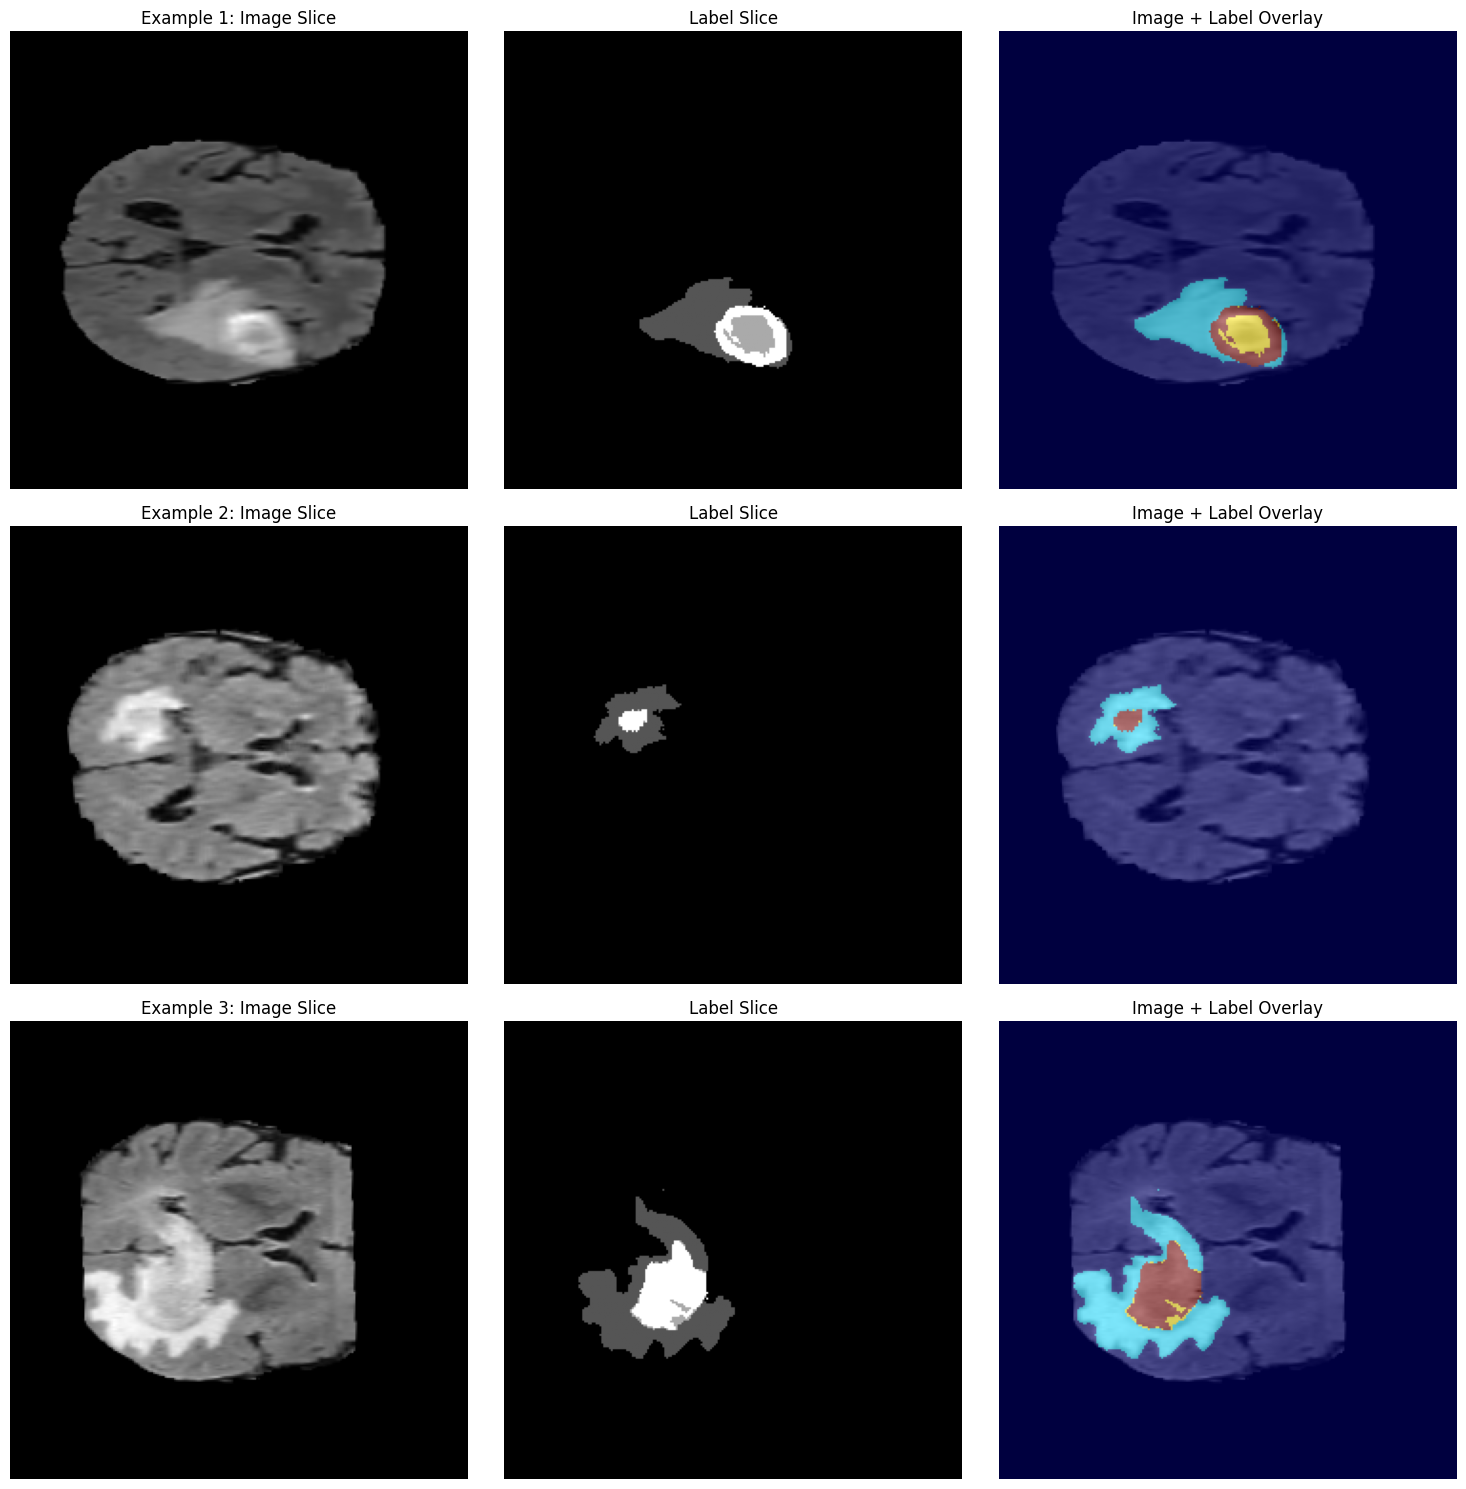

In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

image_dir = 'Task01_BrainTumour/imagesTr'
label_dir = 'Task01_BrainTumour/labelsTr'


image_paths = sorted(glob.glob(os.path.join(image_dir, '*.nii.gz')))
label_paths = sorted(glob.glob(os.path.join(label_dir, '*.nii.gz')))

num_examples = 3

fig, axes = plt.subplots(num_examples, 3, figsize=(15, 15))

# If num_examples is 1, axes won't be a 2D list. Ensure indexing works for both single and multiple examples
if num_examples == 1:
    axes = [axes]  # Make axes a list of lists for consistent indexing


channel_idx = 0

for i in range(num_examples):
    img_path = image_paths[i]
    lbl_path = label_paths[i]

    # Load the image and label volumes using nibabel
    image_nii = nib.load(img_path)
    label_nii = nib.load(lbl_path)

    # Convert nibabel objects to NumPy arrays
    image = image_nii.get_fdata()  # shape: (H, W, D) or (H, W, D, C) if multiple channels
    label = label_nii.get_fdata()  # shape: (H, W, D)

    # If image has multiple channels, pick the specified channel; otherwise, just use the array as is
    if image.ndim == 4:
        # Example shape: (H, W, D, Channels)
        # We'll pick a middle slice along the depth dimension for visualization
        slice_idx = image.shape[2] // 2
        img_slice = image[:, :, slice_idx, channel_idx]
        lbl_slice = label[:, :, slice_idx]
    else:
        # If there's only one channel, the shape might be (H, W, D)
        slice_idx = image.shape[2] // 2
        img_slice = image[:, :, slice_idx]
        lbl_slice = label[:, :, slice_idx]

    # Display the image slice
    axes[i][0].imshow(img_slice, cmap='gray')
    axes[i][0].set_title(f'Example {i+1}: Image Slice')
    axes[i][0].axis('off')

    # Display the label slice
    axes[i][1].imshow(lbl_slice, cmap='gray')
    axes[i][1].set_title('Label Slice')
    axes[i][1].axis('off')

    # Display an overlay of label on the image
    axes[i][2].imshow(img_slice, cmap='gray')
    axes[i][2].imshow(lbl_slice, cmap='jet', alpha=0.5)
    axes[i][2].set_title('Image + Label Overlay')
    axes[i][2].axis('off')

plt.tight_layout()
plt.show()

In [5]:
# standarlize the images
# converting nifiti image into numpy array
import random
from scipy.ndimage import zoom, rotate
def load_nifti(path):
    img = nib.load(path)
    data = img.get_fdata()
    return data

def normalize_volume(volume):
    mean = np.mean(volume)
    std = np.std(volume)
    return (volume-mean) / (std + 1e-8)

def resize_volume(image,target_shape, is_seg=False):
    current_shape = image.shape
    zoom_factors = [t/c for t,c in zip(target_shape,current_shape)]
    if is_seg:
        return zoom(image, zoom_factors,order = 0)
    else:
        return zoom(image,zoom_factors,order = 1)

def random_flip(image,seg):
  # Medical datasets are often small, so applying transformations like flipping
  # and rotation artificially increases the dataset size. This helps prevent overfitting,
  #  making the model perform better on unseen data.
    if random.random() < 0.5:
        image = np.flip(image,axis=1)
        seg = np.flip(seg,axis=1)
    if random.random() < 0.5:
        image = np.flip(image,axis=0)
        seg = np.flip(seg,axis=0)
    return image,seg

def random_rotate(image, seg, max_angle=5):
    """ Randomly rotate the image and label within 'max_angle' degrees. """
    angle = random.uniform(-max_angle, max_angle)
    image_rot = rotate(image, angle, axes=(0,1), reshape=False, order=1)
    seg_rot = rotate(seg, angle, axes=(0,1), reshape=False, order=0)
    return image_rot, seg_rot

def intensity_jitter(image, brightness_factor=0.1, contrast_factor=0.1):
    """ Randomly adjust brightness and contrast of the image. """
    # Random brightness shift
    delta = (random.random() * 2 - 1) * brightness_factor * np.mean(image)
    image = image + delta

    # Random contrast shift
    alpha = 1.0 + (random.random() * 2 - 1) * contrast_factor
    mean_val = np.mean(image)
    image = (image - mean_val) * alpha + mean_val
    return image

def preprocess_and_augment(image_path, seg_path, target_shape=None):
    image = load_nifti(image_path)
    seg = load_nifti(seg_path)

   # === Choose Slice ===
    depth = image.shape[-1] if image.ndim == 3 else image.shape[-2]
    slice_idx = depth // 2

    # If 4D (multi-channel), separate channel dimension from depth dimension
    if image.ndim == 4:  # (H, W, D, C)
        image_slice = image[:, :, slice_idx, :]
    else:  # (H, W, D)
        image_slice = image[:, :, slice_idx]

    mask_slice = seg[:, :, slice_idx]

    # ===  Normalize Image Slice ===
    # We typically don't normalize the mask (it contains discrete labels)
    if image_slice.ndim == 2:
        image_slice = normalize_volume(image_slice)
    else:
        # For multi-channel, normalize each channel separately
        for c in range(image_slice.shape[-1]):
            image_slice[..., c] = normalize_volume(image_slice[..., c])

    # === Resize (Optional) ===
    if target_shape is not None:
        if image_slice.ndim == 2:
          image_slice = resize_volume(image_slice, target_shape, is_seg=False)
          mask_slice = resize_volume(mask_slice, target_shape, is_seg=True)
        else:
          # Multi-channel image -> resize each channel
          h, w, c = image_slice.shape
          # e.g., target_shape = (128, 128) for 2D
          # resize each channel individually
          resized_channels = []
          for ch in range(c):
            resized_ch = resize_volume(image_slice[..., ch], target_shape, is_seg=False)
            resized_channels.append(resized_ch)
          # Stack back along channel dim
          image = np.stack(resized_channels, axis=-1)
          # Resize mask
          seg = resize_volume(mask_slice, target_shape, is_seg=True)

    # === Augmentations ===
    image, seg = random_flip(image, seg)
    image, seg = random_rotate(image, seg, max_angle=10)
    image = intensity_jitter(image, brightness_factor=0.1, contrast_factor=0.1)

    return image, seg



Selected random index:339 out of 483


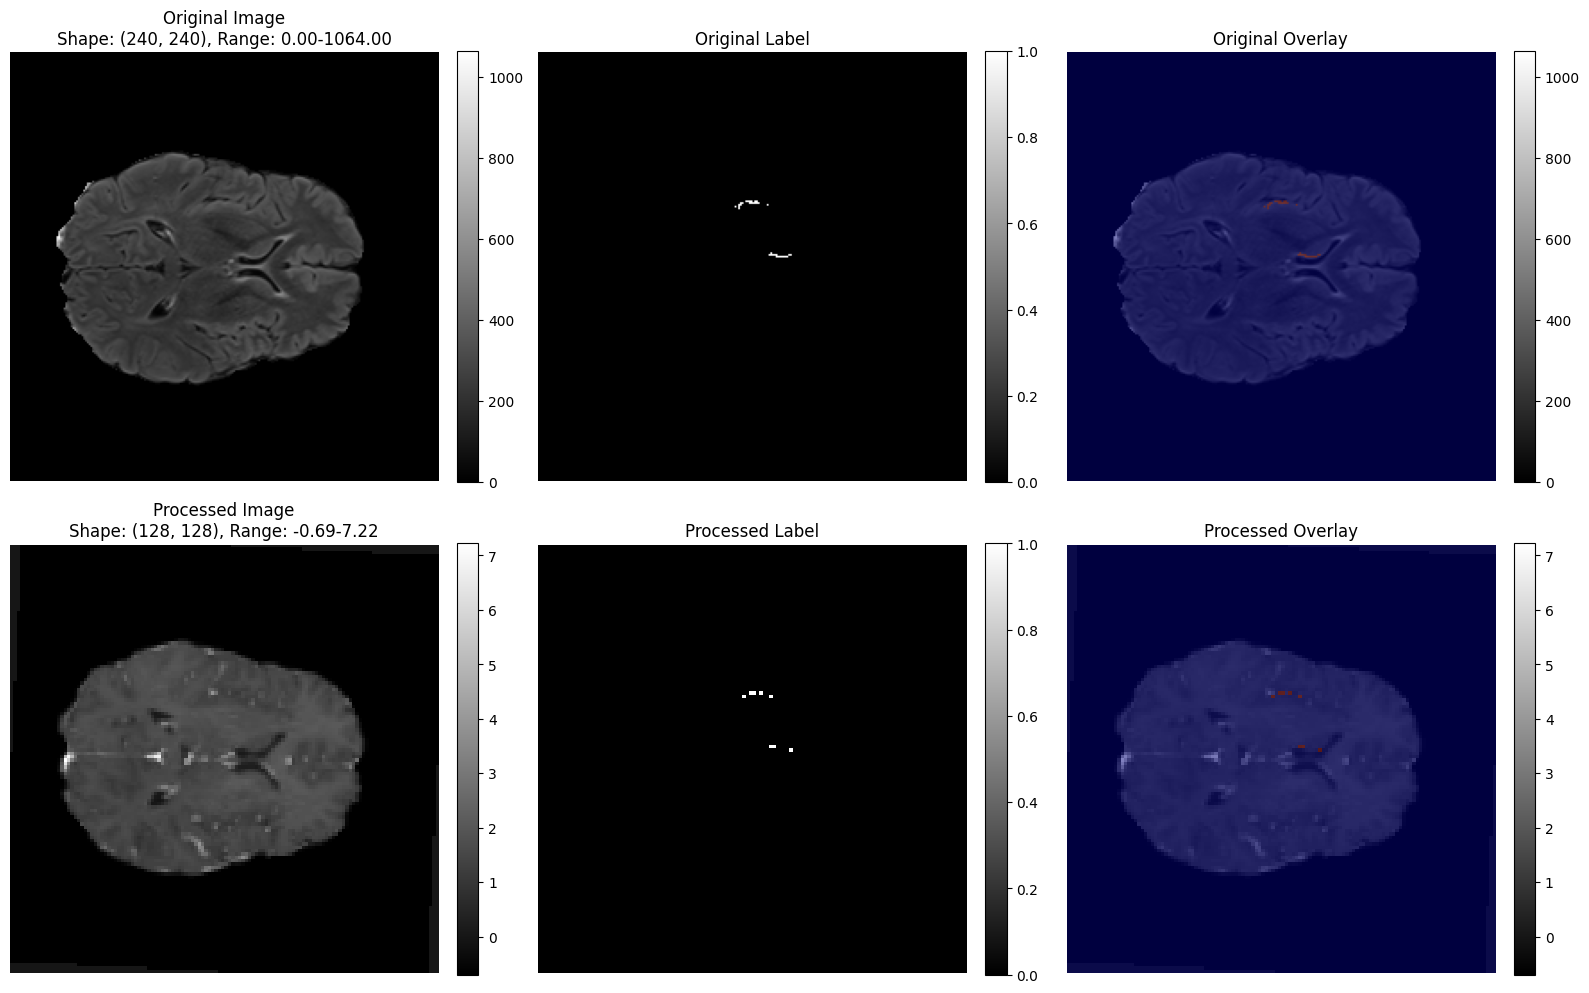

In [6]:
i = random.randint(0,len(image_paths)-1)
print(f"Selected random index:{i} out of {len(image_paths)-1}")

img_path = image_paths[i]
lbl_path = label_paths[i]

image_nii = nib.load(img_path)
label_nii = nib.load(lbl_path)

image_original = image_nii.get_fdata()
label_original = label_nii.get_fdata()

# For visualization, pick a channel and a slice
channel_idx = 0 if image_original.ndim == 4 else None
slice_idx = image_original.shape[2] // 2

if channel_idx is not None:
    img_slice_original = image_original[:, :, slice_idx, channel_idx]
else:
    img_slice_original = image_original[:, :, slice_idx]

lbl_slice_original = label_original[:, :, slice_idx]

target_shape = (128, 128)
image_processed, lbl_slice_processed  = preprocess_and_augment(
    img_path, lbl_path, target_shape=target_shape
)

# Choose a new slice index if shape has changed
slice_idx_processed = image_processed.shape[2] // 2
if len(image_processed.shape) == 4:
    img_slice_processed = image_processed[:, :, slice_idx_processed, channel_idx]
else:
    img_slice_processed = image_processed[:, :, slice_idx_processed]


# === Visualization: Before vs After ===
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# --- Original row ---
cax1 = axes[0][0].imshow(img_slice_original, cmap='gray')
axes[0][0].set_title(
    f'Original Image\nShape: {img_slice_original.shape}, '
    f'Range: {img_slice_original.min():.2f}-{img_slice_original.max():.2f}'
)
axes[0][0].axis('off')
# Add colorbar to show intensity range
plt.colorbar(cax1, ax=axes[0][0], fraction=0.046, pad=0.04)

cax2 = axes[0][1].imshow(lbl_slice_original, cmap='gray')
axes[0][1].set_title('Original Label')
axes[0][1].axis('off')
plt.colorbar(cax2, ax=axes[0][1], fraction=0.046, pad=0.04)

cax3 = axes[0][2].imshow(img_slice_original, cmap='gray')
axes[0][2].imshow(lbl_slice_original, cmap='jet', alpha=0.5)
axes[0][2].set_title('Original Overlay')
axes[0][2].axis('off')
# For the overlay, just show the colorbar for the grayscale image
plt.colorbar(cax3, ax=axes[0][2], fraction=0.046, pad=0.04)

# --- Processed row ---
cax4 = axes[1][0].imshow(img_slice_processed, cmap='gray')
axes[1][0].set_title(
    f'Processed Image\nShape: {img_slice_processed.shape}, '
    f'Range: {img_slice_processed.min():.2f}-{img_slice_processed.max():.2f}'
)
axes[1][0].axis('off')
plt.colorbar(cax4, ax=axes[1][0], fraction=0.046, pad=0.04)

cax5 = axes[1][1].imshow(lbl_slice_processed, cmap='gray')
axes[1][1].set_title('Processed Label')
axes[1][1].axis('off')
plt.colorbar(cax5, ax=axes[1][1], fraction=0.046, pad=0.04)

cax6 = axes[1][2].imshow(img_slice_processed, cmap='gray')
axes[1][2].imshow(lbl_slice_processed, cmap='jet', alpha=0.5)
axes[1][2].set_title('Processed Overlay')
axes[1][2].axis('off')
plt.colorbar(cax6, ax=axes[1][2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

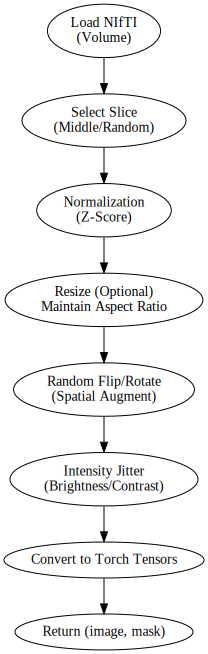

Batch 0 - Images shape: torch.Size([20, 4, 256, 256]), Masks shape: torch.Size([20, 1, 256, 256])


In [7]:
import os
import random
import glob
import numpy as np
import nibabel as nib
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from scipy.ndimage import zoom, rotate
from graphviz import Digraph


def load_nifti(path: str) -> np.ndarray:
    """
    Loads a NIfTI (.nii, .nii.gz) file from the given path and returns a NumPy array.
    """
    nifti_obj = nib.load(path)
    return nifti_obj.get_fdata()


def normalize_volume(volume: np.ndarray, eps: float = 1e-8) -> np.ndarray:
    """
    Z-score normalization of a 3D (or 2D) volume.

    Args:
        volume (np.ndarray): Input image volume.
        eps (float): Small constant to avoid division by zero.
    Returns:
        np.ndarray: Normalized volume with mean ~ 0 and std ~ 1.
    """
    mean = np.mean(volume)
    std = np.std(volume)
    return (volume - mean) / (std + eps)


def resize_volume(image: np.ndarray, target_shape: tuple, is_seg: bool = False) -> np.ndarray:
    """
    Resizes a 3D volume (or 2D slice) to target_shape using different interpolation orders:
      - order=1 for image intensities
      - order=0 for segmentation masks (nearest neighbor)

    Args:
        image (np.ndarray): Input volume (H, W, D) or (H, W).
        target_shape (tuple): Desired output shape (H_new, W_new, D_new) or (H_new, W_new).
        is_seg (bool): Whether the volume is a segmentation mask.

    Returns:
        np.ndarray: Resized volume.
    """
    current_shape = image.shape
    zoom_factors = [t / c for t, c in zip(target_shape, current_shape)]
    order = 0 if is_seg else 1  # nearest-neighbor for masks, linear for images
    return zoom(image, zoom_factors, order=order)


def random_flip(image: np.ndarray, seg: np.ndarray) -> (np.ndarray, np.ndarray):
    """
    Randomly flips the input image & segmentation mask horizontally or vertically with 50% chance each.

    Args:
        image (np.ndarray): 2D or 3D image volume.
        seg (np.ndarray): Corresponding segmentation volume.
    Returns:
        (image, seg): Flipped image & mask.
    """
    # Horizontal flip
    if random.random() < 0.5:
        image = np.flip(image, axis=1)
        seg = np.flip(seg, axis=1)

    # Vertical flip
    if random.random() < 0.5:
        image = np.flip(image, axis=0)
        seg = np.flip(seg, axis=0)
    return image, seg


def random_rotate(image: np.ndarray, seg: np.ndarray, max_angle: float = 10) -> (np.ndarray, np.ndarray):
    """
    Randomly rotates the image & segmentation mask within the range [-max_angle, max_angle] degrees.
    Uses order=1 for images and order=0 for masks to preserve label integrity.

    Args:
        image (np.ndarray): 2D or 3D image volume.
        seg (np.ndarray): Corresponding segmentation volume.
        max_angle (float): Maximum rotation angle in degrees.

    Returns:
        (image_rot, seg_rot): Rotated image & mask.
    """
    angle = random.uniform(-max_angle, max_angle)
    image_rot = rotate(image, angle, axes=(0,1), reshape=False, order=1)
    seg_rot = rotate(seg, angle, axes=(0,1), reshape=False, order=0)
    return image_rot, seg_rot


def intensity_jitter(image: np.ndarray, brightness_factor: float = 0.1, contrast_factor: float = 0.1) -> np.ndarray:
    """
    Randomly adjusts brightness and contrast of the image.

    Args:
        image (np.ndarray): Input image volume (2D or 3D).
        brightness_factor (float): Scale of random brightness change.
        contrast_factor (float): Scale of random contrast change.

    Returns:
        np.ndarray: Image with adjusted brightness/contrast.
    """
    # Brightness shift
    delta = (random.random() * 2 - 1) * brightness_factor * np.mean(image)
    image = image + delta

    # Contrast change
    alpha = 1.0 + (random.random() * 2 - 1) * contrast_factor
    mean_val = np.mean(image)
    image = (image - mean_val) * alpha + mean_val
    return image


def visualize_pipeline_graph():
    """
    Optionally visualizes the data loading pipeline using graphviz.
    """

    dot = Digraph(comment='MedicalSegmentationDataset Pipeline')
    dot.node("A", "Load NIfTI\n(Volume)")
    dot.node("B", "Select Slice\n(Middle/Random)")
    dot.node("C", "Normalization\n(Z-Score)")
    dot.node("D", "Resize (Optional)\nMaintain Aspect Ratio")
    dot.node("E", "Random Flip/Rotate\n(Spatial Augment)")
    dot.node("F", "Intensity Jitter\n(Brightness/Contrast)")
    dot.node("G", "Convert to Torch Tensors")
    dot.node("H", "Return (image, mask)")

    # Edges
    dot.edges(["AB", "BC", "CD", "DE", "EF", "FG", "GH"])

    return dot


class MedicalSegmentationDataset(Dataset):
    """
    A PyTorch Dataset for loading, preprocessing, and augmenting 2D slices
    from 3D medical volumes (e.g., Brain MRI scans).

    Args:
        image_paths (List[str]): List of paths to MRI volumes in NIfTI format.
        mask_paths (List[str]): List of paths to segmentation masks in NIfTI format.
        slice_choice (str): "middle" or "random" - how we pick the slice along the depth dimension.
        target_shape (tuple): Desired output shape for resizing (e.g., (H, W)) or None to skip resizing.
        apply_augmentation (bool): Whether to apply random flipping, rotation, and intensity jitter.
    """
    def __init__(self,
                 image_paths,
                 mask_paths,
                 slice_choice='middle',
                 target_shape=None,
                 apply_augmentation=True):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.slice_choice = slice_choice
        self.target_shape = target_shape
        self.apply_augmentation = apply_augmentation

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # === 1) Load Data ===
        image = load_nifti(self.image_paths[idx])  # shape: (H, W, D) or (H, W, D, C)
        mask = load_nifti(self.mask_paths[idx])    # shape: (H, W, D)

        # === 2) Choose Slice ===
        depth = image.shape[-1] if image.ndim == 3 else image.shape[-2]
        if self.slice_choice == 'middle':
            slice_idx = depth // 2
        elif self.slice_choice == 'random':
            slice_idx = random.randint(0, depth - 1)
        else:
            raise ValueError("slice_choice must be 'middle' or 'random'.")

        # If 4D (multi-channel), separate channel dimension from depth dimension
        if image.ndim == 4:  # (H, W, D, C)
            image_slice = image[:, :, slice_idx, :]
        else:  # (H, W, D)
            image_slice = image[:, :, slice_idx]

        mask_slice = mask[:, :, slice_idx]

        # === 3) Normalize Image Slice ===
        # We typically don't normalize the mask (it contains discrete labels)
        if image_slice.ndim == 2:
            image_slice = normalize_volume(image_slice)
        else:
            # For multi-channel, normalize each channel separately
            for c in range(image_slice.shape[-1]):
                image_slice[..., c] = normalize_volume(image_slice[..., c])

        # === 4) Resize (Optional) ===
        if self.target_shape is not None:
            if image_slice.ndim == 2:
                image_slice = resize_volume(image_slice, self.target_shape, is_seg=False)
                mask_slice = resize_volume(mask_slice, self.target_shape, is_seg=True)
            else:
                # Multi-channel image -> resize each channel
                h, w, c = image_slice.shape
                # e.g., target_shape = (128, 128) for 2D
                # resize each channel individually
                resized_channels = []
                for ch in range(c):
                    resized_ch = resize_volume(image_slice[..., ch], self.target_shape, is_seg=False)
                    resized_channels.append(resized_ch)
                # Stack back along channel dim
                image_slice = np.stack(resized_channels, axis=-1)
                # Resize mask
                mask_slice = resize_volume(mask_slice, self.target_shape, is_seg=True)

        # === 5) Augment (Random Flip, Rotate, Jitter) ===
        if self.apply_augmentation:
            # If multi-channel, apply augmentations on each channel identically
            # Easiest is to unify shapes for flipping/rotation
            if image_slice.ndim == 3:
                # shape: (H, W, C)
                # we'll apply the same transformations to each channel in a loop
                # but random_flip and random_rotate operate on (H, W) arrays
                # -> stack channels along the 3rd axis, apply once
                # -> we treat channels as if they're a "stack"
                # For flipping, we can do the entire multi-channel in one operation
                image_slice, mask_slice = random_flip(image_slice, mask_slice)
                image_slice, mask_slice = random_rotate(image_slice, mask_slice, max_angle=5)
                # For intensity jitter, we do each channel separately
                for c in range(image_slice.shape[-1]):
                    image_slice[..., c] = intensity_jitter(image_slice[..., c])
            else:
                image_slice, mask_slice = random_flip(image_slice, mask_slice)
                image_slice, mask_slice = random_rotate(image_slice, mask_slice, max_angle=5)
                image_slice = intensity_jitter(image_slice)

        # === 6) Convert to Torch Tensor (Channels First) ===
        # If 2D single-channel: shape -> (1, H, W)
        # If 2D multi-channel: shape -> (C, H, W)
        if image_slice.ndim == 2:
            # single-channel
            image_slice = np.expand_dims(image_slice, axis=0)
            mask_slice = np.expand_dims(mask_slice, axis=0)
        else:
            # multi-channel, e.g. (H, W, C) -> (C, H, W)
            image_slice = np.transpose(image_slice, (2, 0, 1))
            mask_slice = np.expand_dims(mask_slice, axis=0)

        # Convert to torch Tensors
        image_slice = torch.from_numpy(image_slice).float()
        mask_slice = torch.from_numpy(mask_slice).long()

        return image_slice, mask_slice


if __name__ == "__main__":

    # Example usage:
    image_dir = "Task01_BrainTumour/imagesTr"
    mask_dir = "Task01_BrainTumour/labelsTr"
    image_paths = sorted(glob.glob(os.path.join(image_dir, "*.nii.gz")))
    mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.nii.gz")))

    dataset = MedicalSegmentationDataset(
        image_paths=image_paths,
        mask_paths=mask_paths,
        slice_choice='middle',    # 'middle' or 'random'
        target_shape=(256, 256),  # e.g., resizing to (128,128)
        apply_augmentation=True
    )

    # Create a DataLoader for parallelized loading
    dataloader = DataLoader(
        dataset,
        batch_size=20,
        shuffle=True,
        pin_memory=True
    )

    # Visualize the pipeline
    pipeline_graph = visualize_pipeline_graph()
    pipeline_graph.render("medical_seg_pipeline", view=False)  # creates a file named 'medical_seg_pipeline'
    display(pipeline_graph)  # display inline

    # One iteration example
    for batch_idx, (images, masks) in enumerate(dataloader):
        print(f"Batch {batch_idx} - Images shape: {images.shape}, Masks shape: {masks.shape}")
        # images: (B, C, H, W)
        # masks:  (B, 1, H, W)
        # Perform training step, etc.
        if batch_idx == 0:
            break

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot

class DoubleConv(nn.Module):
  def __init__(
        self,
        in_channels: int,
        out_channels: int,
        norm_type: str = None,
        dropout: float = 0.0
    ):
        """
        Args:
            in_channels  (int): Number of input channels.
            out_channels (int): Number of output channels for the convolutions.
            norm_type    (str): Type of normalization ('batch', 'instance', 'group', or None).
            dropout     (float): Dropout probability (0.0 means no dropout).
        """
        super().__init__()
        layers = []

        # First conv
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=True))
        if norm_type == 'batch':
            layers.append(nn.BatchNorm2d(out_channels))
        elif norm_type == 'instance':
            layers.append(nn.InstanceNorm2d(out_channels, affine=True))
        elif norm_type == 'group':
            # e.g., group norm with 8 groups; adjust as needed
            layers.append(nn.GroupNorm(num_groups=8, num_channels=out_channels))
        layers.append(nn.ReLU(inplace=True))

        # Second conv
        layers.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=True))
        if norm_type == 'batch':
            layers.append(nn.BatchNorm2d(out_channels))
        elif norm_type == 'instance':
            layers.append(nn.InstanceNorm2d(out_channels, affine=True))
        elif norm_type == 'group':
            layers.append(nn.GroupNorm(num_groups=8, num_channels=out_channels))
        layers.append(nn.ReLU(inplace=True))

        # Optional dropout
        if dropout > 0.0:
            layers.append(nn.Dropout(p=dropout))

        self.net = nn.Sequential(*layers)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.net(x)





UNet(
  (enc1): DoubleConv(
    (net): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Dropout(p=0.1, inplace=False)
    )
  )
  (enc2): DoubleConv(
    (net): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Dropout(p=0.1, inplace=False)
    )
  )
  (enc3): D

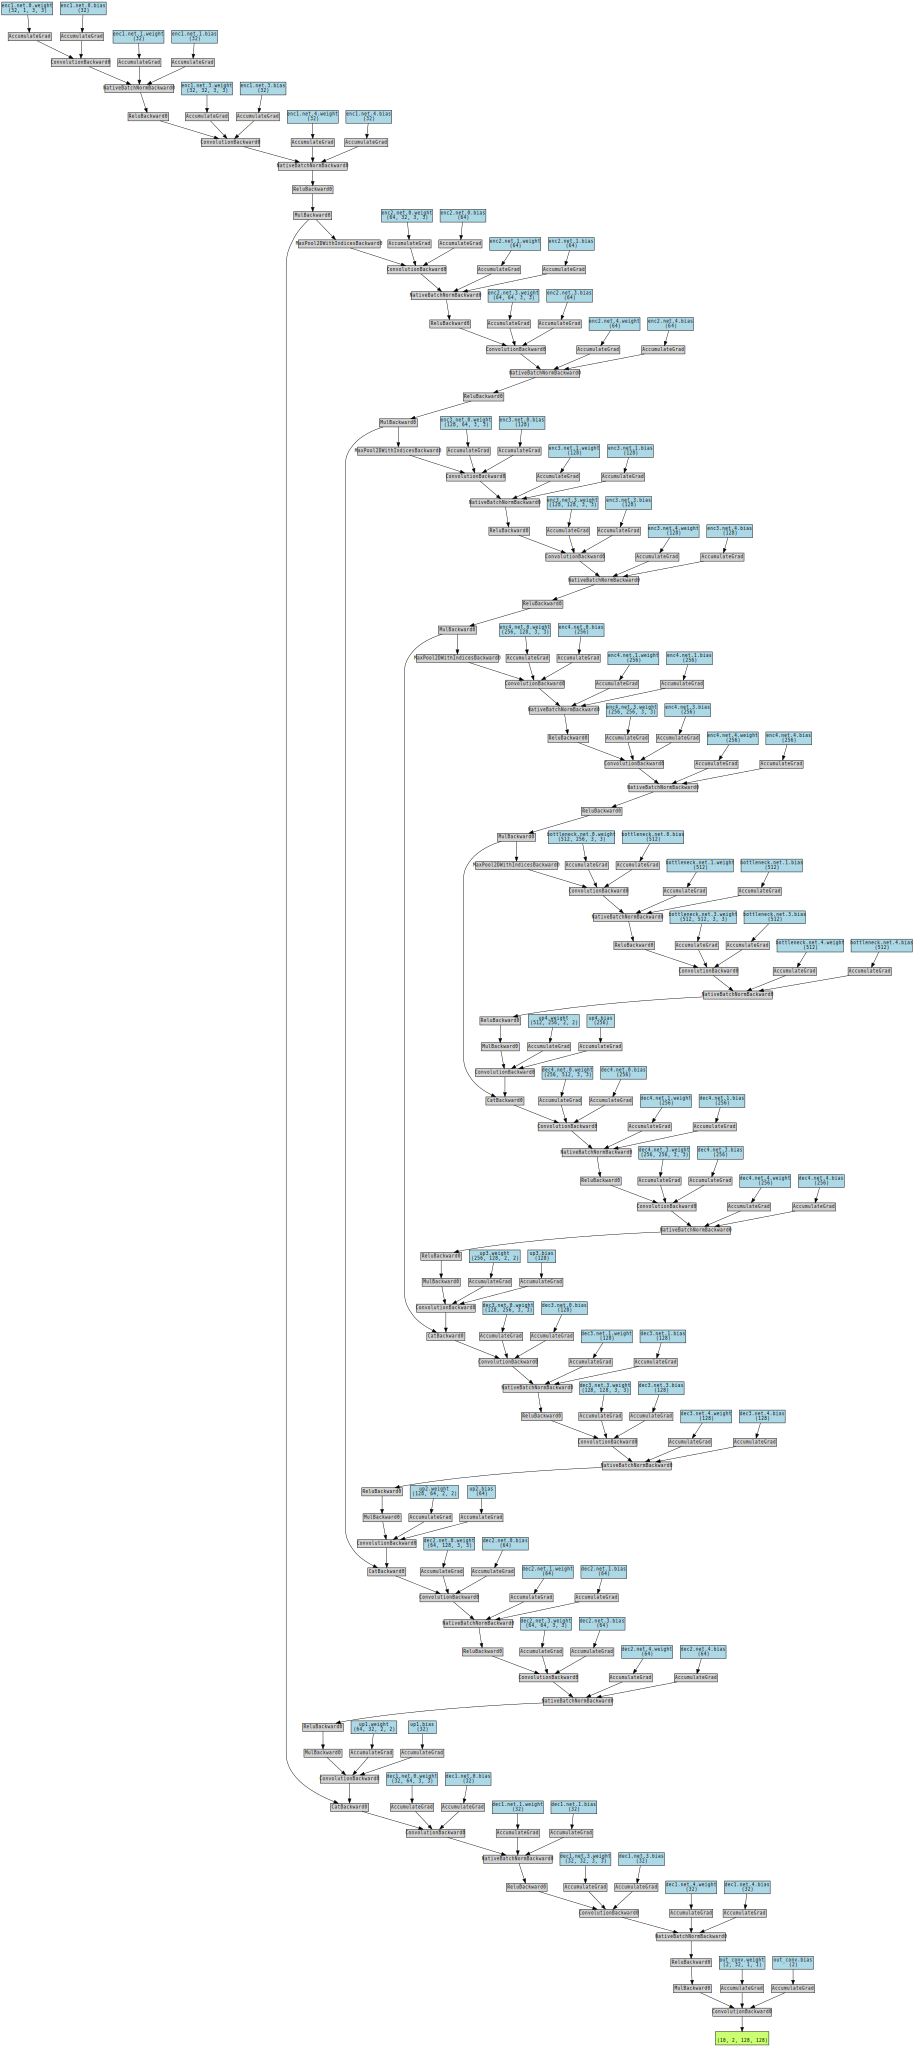

In [9]:
class UNet(nn.Module):
    def __init__(
            self,
            in_channels: int = 1,
            out_channels: int = 2,
            base_filters: int = 64,
            norm_type: str = None,
            dropout: float = 0.0
        ):
            super().__init__()

            # === Encoder ===
            self.enc1 = DoubleConv(in_channels, base_filters, norm_type=norm_type, dropout=dropout)
            self.enc2 = DoubleConv(base_filters, base_filters * 2, norm_type=norm_type, dropout=dropout)
            self.enc3 = DoubleConv(base_filters * 2, base_filters * 4, norm_type=norm_type, dropout=dropout)
            self.enc4 = DoubleConv(base_filters * 4, base_filters * 8, norm_type=norm_type, dropout=dropout)

            self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

            # === Bottleneck ===
            self.bottleneck = DoubleConv(base_filters * 8, base_filters * 16, norm_type=norm_type, dropout=dropout)

            # === Decoder ===
            self.up4 = nn.ConvTranspose2d(base_filters * 16, base_filters * 8, kernel_size=2, stride=2)
            self.dec4 = DoubleConv(base_filters * 16, base_filters * 8, norm_type=norm_type, dropout=dropout)

            self.up3 = nn.ConvTranspose2d(base_filters * 8, base_filters * 4, kernel_size=2, stride=2)
            self.dec3 = DoubleConv(base_filters * 8, base_filters * 4, norm_type=norm_type, dropout=dropout)

            self.up2 = nn.ConvTranspose2d(base_filters * 4, base_filters * 2, kernel_size=2, stride=2)
            self.dec2 = DoubleConv(base_filters * 4, base_filters * 2, norm_type=norm_type, dropout=dropout)

            self.up1 = nn.ConvTranspose2d(base_filters * 2, base_filters, kernel_size=2, stride=2)
            self.dec1 = DoubleConv(base_filters * 2, base_filters, norm_type=norm_type, dropout=dropout)

            self.out_conv = nn.Conv2d(base_filters, out_channels, kernel_size=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
            # Encoder (downsampling path)
            e1 = self.enc1(x)
            e2 = self.enc2(self.pool(e1))
            e3 = self.enc3(self.pool(e2))
            e4 = self.enc4(self.pool(e3))

            # Bottleneck
            b = self.bottleneck(self.pool(e4))

            # Decoder (upsampling path)
            d4 = self.up4(b)
            d4 = torch.cat((d4, e4), dim=1)
            d4 = self.dec4(d4)

            d3 = self.up3(d4)
            d3 = torch.cat((d3, e3), dim=1)
            d3 = self.dec3(d3)

            d2 = self.up2(d3)
            d2 = torch.cat((d2, e2), dim=1)
            d2 = self.dec2(d2)

            d1 = self.up1(d2)
            d1 = torch.cat((d1, e1), dim=1)
            d1 = self.dec1(d1)

            out = self.out_conv(d1)
            return out


if __name__ == "__main__":
    # Example usage and visualization of the network

    # Instantiate the model
    model = UNet(in_channels=1, out_channels=2, base_filters=32, norm_type='batch', dropout=0.1)
    print(model)

    # Create a dummy input tensor for testing
    dummy_input = torch.randn(10, 1, 128, 128)  # (batch_size, channels, height, width)

    # Forward pass
    output = model(dummy_input)
    print(f"Output shape: {output.shape}")

    dot = make_dot(output, params=dict(model.named_parameters()))
    dot.render("unet_architecture", format="png")
    display(dot)

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import os

criterion = nn.CrossEntropyLoss()

def dice_coefficient(pred,target,smooth=1e-6):
    pred_classes = torch.argmax(pred,dim=1)
    batch_size,height,width = pred_classes.shape
    num_classes = pred.shape[1]
    pred_one_hot = torch.zeros((batch_size, num_classes, height, width), device=pred.device)
    target_one_hot = torch.zeros((batch_size, num_classes, height, width), device=target.device)

    pred_one_hot.scatter_(1, pred_classes.unsqueeze(1), 1) # scatter_(dim, index, value) assigns value to the specified index along the given dim.
    # pred_classes.unsqueeze(1) reshapes the class index tensor to (B, 1, H, W), so it can be used as an index for one-hot encoding.
    target_one_hot.scatter_(1, target.unsqueeze(1), 1)

    # Compute Dice for each class, then average
    intersection = (pred_one_hot * target_one_hot).sum(dim=(2, 3))
    union = pred_one_hot.sum(dim=(2, 3)) + target_one_hot.sum(dim=(2, 3))
    dice_per_class = (2.0 * intersection + smooth) / (union + smooth)
    # Average across classes, then across batch
    return dice_per_class.mean()



In [21]:
def train_segmentation_model(
    model,
    train_loader,
    val_loader,
    optimizer,
    device,
    num_epochs=30,
    checkpoint_dir='checkpoints',
    checkpoint_freq=5,
):

    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    history = {
        "train_loss": [],
        "val_loss": [],
        "train_dice": [],
        "val_dice": []
    }


    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        running_train_dice = 0.0

        # === Training Epoch ===
        for images, masks in tqdm(train_loader, desc=f"Train Epoch {epoch+1}/{num_epochs}"):
            images = images.to(device)
            masks = masks.to(device)  # shape (B, 1, H, W)

            outputs = model(images)    # shape (B, num_classes, H, W)
            loss = criterion(outputs, masks.squeeze(1))  # CrossEntropyLoss

            optimizer.zero_grad() # PyTorch accumulates gradients by default.
            # Without zero_grad(), gradients from previous iterations would be added to the new ones.
            loss.backward()
            optimizer.step()

            # Accumulate metrics
            running_train_loss += loss.item() # loss.item() is used to extract the scalar value from a tensor.
            # The loss variable is a PyTorch tensor, which includes computational graph information required for backpropagation.
            running_train_dice += dice_coefficient(outputs, masks.squeeze(1)).item()

        train_loss = running_train_loss / len(train_loader)
        train_dice = running_train_dice / len(train_loader)

        # === Validation Epoch ===
        model.eval()
        running_val_loss = 0.0
        running_val_dice = 0.0

        with torch.no_grad():
            for images, masks in tqdm(val_loader, desc=f"Val Epoch {epoch+1}/{num_epochs}"):
                images = images.to(device)
                masks = masks.to(device)

                outputs = model(images)
                val_loss = criterion(outputs, masks.squeeze(1))

                running_val_loss += val_loss.item()
                running_val_dice += dice_coefficient(outputs, masks.squeeze(1)).item()

        val_loss = running_val_loss / len(val_loader)
        val_dice = running_val_dice / len(val_loader)

        # === Logging & Checkpoints ===
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_dice"].append(train_dice)
        history["val_dice"].append(val_dice)

        print(f"\nEpoch [{epoch+1}/{num_epochs}]"
              f" - Train Loss: {train_loss:.4f}, Train DSC: {train_dice:.4f}"
              f" | Val Loss: {val_loss:.4f}, Val DSC: {val_dice:.4f}")

        # Save checkpoint periodically
        if (epoch + 1) % checkpoint_freq == 0:
            checkpoint_path = os.path.join(checkpoint_dir, f"unet_epoch{epoch+1}.pth")
            torch.save(model.state_dict(), checkpoint_path)
            print(f"Saved checkpoint: {checkpoint_path}")

    return history

In [22]:
def load_checkpoint(model, optimizer, checkpoint_dir):
    import glob
    checkpoint_files = glob.glob(os.path.join(checkpoint_dir, "unet_epoch*.pth"))
    print("checkpoint_files",checkpoint_files)

    if not checkpoint_files:
        print("⚠️ No checkpoint found. Starting from scratch.")
        return 0  # Start from epoch 0

    # Find the latest checkpoint
    latest_checkpoint = max(checkpoint_files, key=os.path.getctime)
    checkpoint = torch.load(latest_checkpoint, map_location=device)
    model.load_state_dict(checkpoint)

    # Extract the epoch number from filename
    start_epoch = int(latest_checkpoint.split("epoch")[-1].split(".pth")[0])

    print(f"✅ Loaded model weights from {latest_checkpoint}")
    print(f"✅ Resumed training from {latest_checkpoint} (Epoch {start_epoch})")
    return start_epoch

In [30]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.functional as F

def calculate_iou(pred_mask, true_mask):
    """Calculate Intersection-over-Union (IoU) metric."""
    intersection = np.logical_and(pred_mask, true_mask).sum()
    union = np.logical_or(pred_mask, true_mask).sum()
    return intersection / union if union != 0 else 0

def visualize_segmentation(model, val_loader, device, fold_idx):

    model.eval()  # Set the model to evaluation mode
    selected_samples = random.sample(range(len(val_loader.dataset)), 5)  # Select 5 random samples
    fig, axes = plt.subplots(5, 3, figsize=(12, 15))  # Create a 5x3 grid for visualization

    for i, idx in enumerate(selected_samples):
        # Load data
        image, true_mask = val_loader.dataset[idx]
        image = image.to(device).unsqueeze(0)  # Add batch dimension
        true_mask = true_mask.numpy()  # Convert ground truth mask to numpy array

        # Generate prediction
        with torch.no_grad():
            pred_mask = model(image)
            pred_mask = torch.sigmoid(pred_mask).cpu().numpy()[0, 0]  # Apply sigmoid and get single channel
            pred_mask = (pred_mask > 0.5).astype(np.uint8)  # Threshold to binary mask

        # Calculate IoU
        iou = calculate_iou(pred_mask, true_mask)


# for debug

        # print(f"Image shape: {image.shape}")  # Check input shape
        # print(f"True Mask shape: {true_mask.shape}")  # Check ground truth mask
        # print(f"Pred Mask shape: {pred_mask.shape}")  # Check predicted mask


        image_np = image.cpu().numpy().squeeze()
        image_np = image_np[0]
        true_mask = np.squeeze(true_mask)
        pred_mask = np.squeeze(pred_mask)


        # Plot input image slice
        axes[i, 0].imshow(image.cpu().numpy()[0, 0], cmap='gray')  # Assuming first channel for multi-channel input
        axes[i, 0].set_title("Input Image")
        axes[i, 0].axis("off")

        # Plot ground truth segmentation label
        axes[i, 1].imshow(true_mask, cmap='viridis')
        axes[i, 1].set_title("Ground Truth")
        axes[i, 1].axis("off")

        # Plot model's predicted segmentation
        axes[i, 2].imshow(pred_mask, cmap='viridis')
        axes[i, 2].set_title(f"Predicted (IoU: {iou:.2f})")
        axes[i, 2].axis("off")

    plt.suptitle(f"Fold {fold_idx + 1}: Segmentation Results", fontsize=16)
    plt.tight_layout()
    plt.show()




Total images found: 484
Total labels found: 484
Using CUDA on NVIDIA A100-SXM4-40GB!

 Starting Fold 1/5
Training samples:387,Validation samples:97


Val Epoch 1/10: 100%|██████████| 20/20 [01:16<00:00,  3.80s/it]



Epoch [1/10] - Train Loss: 0.4571, Train DSC: 0.4317 | Val Loss: 0.1106, Val DSC: 0.4399


Val Epoch 2/10: 100%|██████████| 20/20 [01:16<00:00,  3.80s/it]



Epoch [2/10] - Train Loss: 0.0874, Train DSC: 0.4373 | Val Loss: 0.0786, Val DSC: 0.4399


Val Epoch 3/10: 100%|██████████| 20/20 [01:16<00:00,  3.80s/it]



Epoch [3/10] - Train Loss: 0.0731, Train DSC: 0.4793 | Val Loss: 0.0696, Val DSC: 0.5289


Val Epoch 4/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [4/10] - Train Loss: 0.0686, Train DSC: 0.5218 | Val Loss: 0.0640, Val DSC: 0.5326


Val Epoch 5/10: 100%|██████████| 20/20 [01:16<00:00,  3.80s/it]



Epoch [5/10] - Train Loss: 0.0658, Train DSC: 0.5359 | Val Loss: 0.0679, Val DSC: 0.5181
Saved checkpoint: checkpoints_brain_tumor/unet_epoch5.pth


Val Epoch 6/10: 100%|██████████| 20/20 [01:15<00:00,  3.79s/it]



Epoch [6/10] - Train Loss: 0.0589, Train DSC: 0.5483 | Val Loss: 0.0568, Val DSC: 0.5674


Val Epoch 7/10: 100%|██████████| 20/20 [01:15<00:00,  3.80s/it]



Epoch [7/10] - Train Loss: 0.0544, Train DSC: 0.5772 | Val Loss: 0.0598, Val DSC: 0.6023


Val Epoch 8/10: 100%|██████████| 20/20 [01:16<00:00,  3.80s/it]



Epoch [8/10] - Train Loss: 0.0508, Train DSC: 0.6047 | Val Loss: 0.0524, Val DSC: 0.6348


Val Epoch 9/10: 100%|██████████| 20/20 [01:15<00:00,  3.80s/it]



Epoch [9/10] - Train Loss: 0.0495, Train DSC: 0.6304 | Val Loss: 0.0501, Val DSC: 0.5970


Val Epoch 10/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [10/10] - Train Loss: 0.0442, Train DSC: 0.6394 | Val Loss: 0.0408, Val DSC: 0.6496
Saved checkpoint: checkpoints_brain_tumor/unet_epoch10.pth


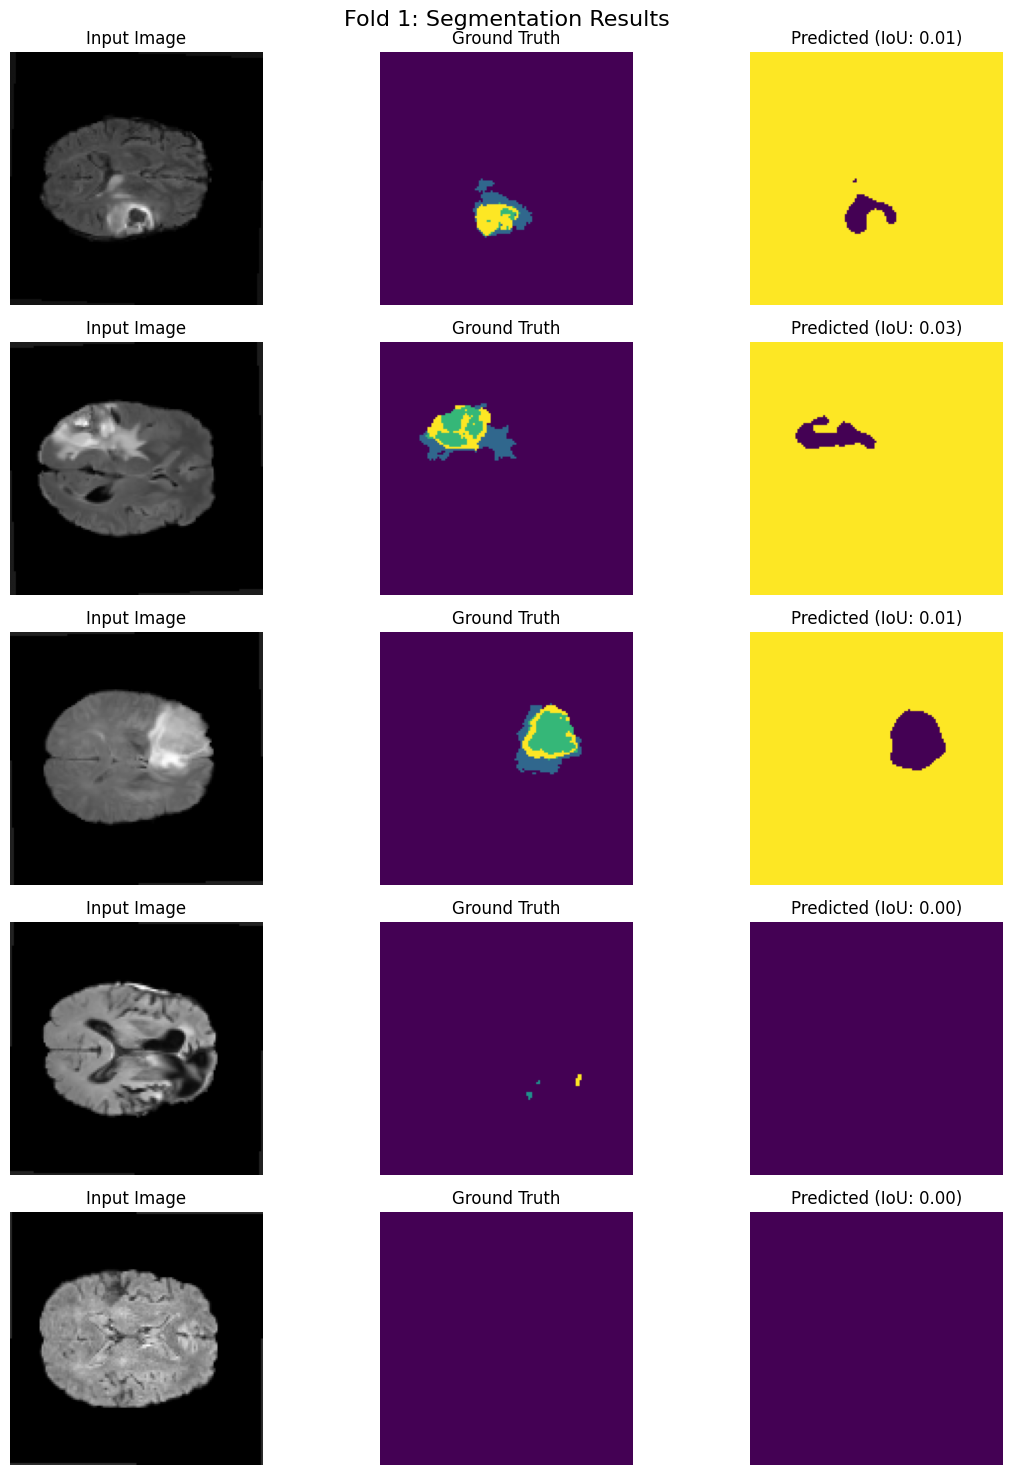


 Starting Fold 2/5
Training samples:387,Validation samples:97


Val Epoch 1/10: 100%|██████████| 20/20 [01:15<00:00,  3.80s/it]



Epoch [1/10] - Train Loss: 0.4302, Train DSC: 0.4334 | Val Loss: 0.0903, Val DSC: 0.4326


Val Epoch 2/10: 100%|██████████| 20/20 [01:15<00:00,  3.80s/it]



Epoch [2/10] - Train Loss: 0.0800, Train DSC: 0.4406 | Val Loss: 0.0795, Val DSC: 0.4720


Val Epoch 3/10: 100%|██████████| 20/20 [01:15<00:00,  3.80s/it]



Epoch [3/10] - Train Loss: 0.0743, Train DSC: 0.4932 | Val Loss: 0.0677, Val DSC: 0.5233


Val Epoch 4/10: 100%|██████████| 20/20 [01:15<00:00,  3.80s/it]



Epoch [4/10] - Train Loss: 0.0659, Train DSC: 0.5224 | Val Loss: 0.0746, Val DSC: 0.5552


Val Epoch 5/10: 100%|██████████| 20/20 [01:15<00:00,  3.80s/it]



Epoch [5/10] - Train Loss: 0.0627, Train DSC: 0.5327 | Val Loss: 0.0578, Val DSC: 0.5583
Saved checkpoint: checkpoints_brain_tumor/unet_epoch5.pth


Val Epoch 6/10: 100%|██████████| 20/20 [01:15<00:00,  3.79s/it]



Epoch [6/10] - Train Loss: 0.0569, Train DSC: 0.5554 | Val Loss: 0.0628, Val DSC: 0.5931


Val Epoch 7/10: 100%|██████████| 20/20 [01:15<00:00,  3.80s/it]



Epoch [7/10] - Train Loss: 0.0541, Train DSC: 0.5729 | Val Loss: 0.0514, Val DSC: 0.6006


Val Epoch 8/10: 100%|██████████| 20/20 [01:16<00:00,  3.80s/it]



Epoch [8/10] - Train Loss: 0.0506, Train DSC: 0.5965 | Val Loss: 0.0477, Val DSC: 0.6198


Val Epoch 9/10: 100%|██████████| 20/20 [01:15<00:00,  3.80s/it]



Epoch [9/10] - Train Loss: 0.0474, Train DSC: 0.6270 | Val Loss: 0.0499, Val DSC: 0.6223


Val Epoch 10/10: 100%|██████████| 20/20 [01:16<00:00,  3.80s/it]



Epoch [10/10] - Train Loss: 0.0434, Train DSC: 0.6416 | Val Loss: 0.0417, Val DSC: 0.6556
Saved checkpoint: checkpoints_brain_tumor/unet_epoch10.pth


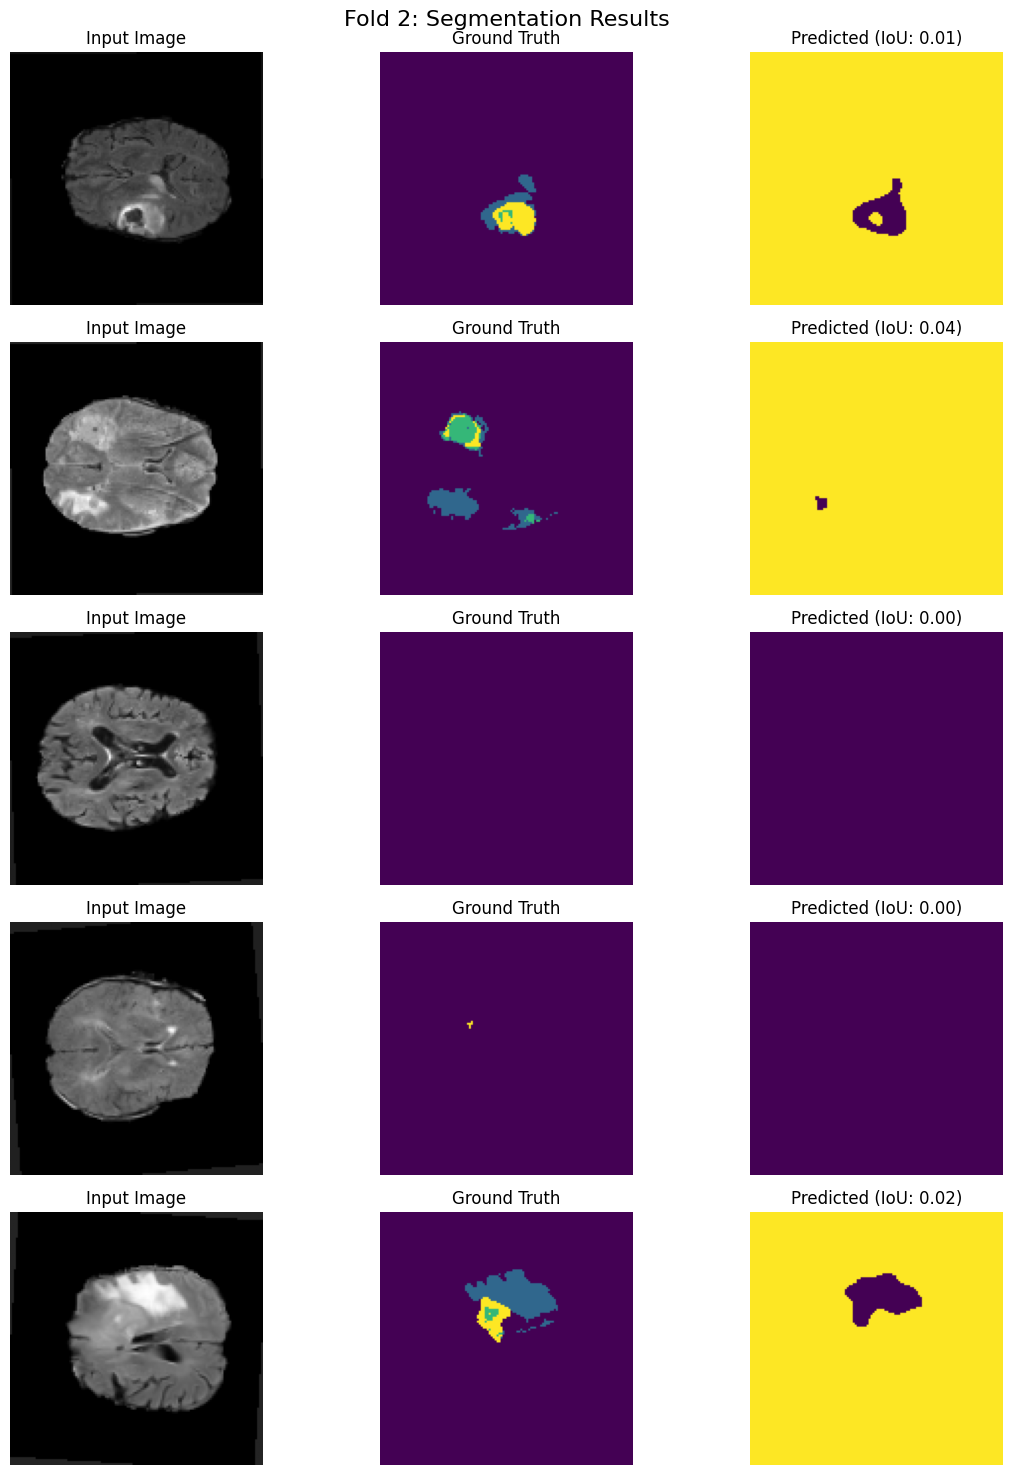


 Starting Fold 3/5
Training samples:387,Validation samples:97


Val Epoch 1/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [1/10] - Train Loss: 0.4491, Train DSC: 0.4344 | Val Loss: 0.1069, Val DSC: 0.4476


Val Epoch 2/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [2/10] - Train Loss: 0.0843, Train DSC: 0.4459 | Val Loss: 0.0701, Val DSC: 0.5152


Val Epoch 3/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [3/10] - Train Loss: 0.0718, Train DSC: 0.5058 | Val Loss: 0.0709, Val DSC: 0.5319


Val Epoch 4/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [4/10] - Train Loss: 0.0675, Train DSC: 0.5220 | Val Loss: 0.0627, Val DSC: 0.5413


Val Epoch 5/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [5/10] - Train Loss: 0.0620, Train DSC: 0.5310 | Val Loss: 0.0602, Val DSC: 0.5491
Saved checkpoint: checkpoints_brain_tumor/unet_epoch5.pth


Val Epoch 6/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [6/10] - Train Loss: 0.0598, Train DSC: 0.5332 | Val Loss: 0.0641, Val DSC: 0.5541


Val Epoch 7/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [7/10] - Train Loss: 0.0581, Train DSC: 0.5341 | Val Loss: 0.0576, Val DSC: 0.5501


Val Epoch 8/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [8/10] - Train Loss: 0.0550, Train DSC: 0.5369 | Val Loss: 0.0522, Val DSC: 0.5864


Val Epoch 9/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [9/10] - Train Loss: 0.0540, Train DSC: 0.5638 | Val Loss: 0.0531, Val DSC: 0.5841


Val Epoch 10/10: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]



Epoch [10/10] - Train Loss: 0.0509, Train DSC: 0.5736 | Val Loss: 0.0470, Val DSC: 0.6109
Saved checkpoint: checkpoints_brain_tumor/unet_epoch10.pth


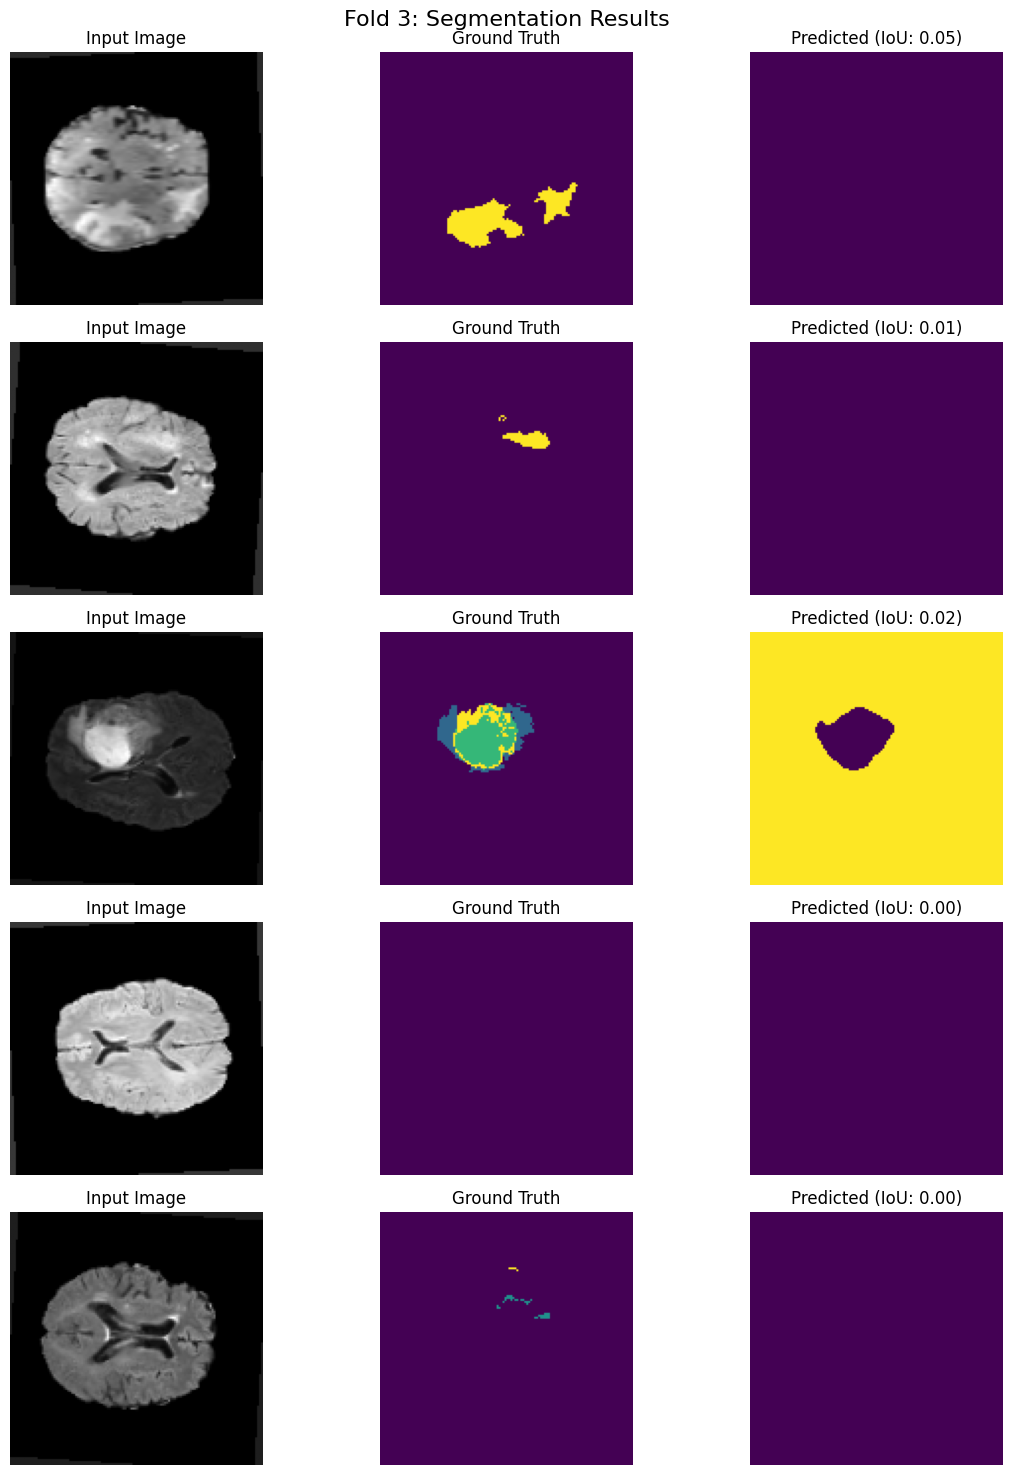


 Starting Fold 4/5
Training samples:387,Validation samples:97


Val Epoch 1/10: 100%|██████████| 20/20 [01:16<00:00,  3.82s/it]



Epoch [1/10] - Train Loss: 0.4544, Train DSC: 0.4165 | Val Loss: 0.1154, Val DSC: 0.4195


Val Epoch 2/10: 100%|██████████| 20/20 [01:16<00:00,  3.80s/it]



Epoch [2/10] - Train Loss: 0.0869, Train DSC: 0.4396 | Val Loss: 0.0826, Val DSC: 0.4195


Val Epoch 3/10: 100%|██████████| 20/20 [01:16<00:00,  3.84s/it]



Epoch [3/10] - Train Loss: 0.0705, Train DSC: 0.4584 | Val Loss: 0.0710, Val DSC: 0.5118


Val Epoch 4/10: 100%|██████████| 20/20 [01:16<00:00,  3.84s/it]



Epoch [4/10] - Train Loss: 0.0636, Train DSC: 0.5269 | Val Loss: 0.0677, Val DSC: 0.5224


Val Epoch 5/10: 100%|██████████| 20/20 [01:16<00:00,  3.85s/it]



Epoch [5/10] - Train Loss: 0.0598, Train DSC: 0.5331 | Val Loss: 0.0629, Val DSC: 0.5146
Saved checkpoint: checkpoints_brain_tumor/unet_epoch5.pth


Val Epoch 6/10: 100%|██████████| 20/20 [01:16<00:00,  3.84s/it]



Epoch [6/10] - Train Loss: 0.0552, Train DSC: 0.5566 | Val Loss: 0.0613, Val DSC: 0.5769


Val Epoch 7/10: 100%|██████████| 20/20 [01:16<00:00,  3.84s/it]



Epoch [7/10] - Train Loss: 0.0548, Train DSC: 0.5800 | Val Loss: 0.0534, Val DSC: 0.6024


Val Epoch 8/10: 100%|██████████| 20/20 [01:16<00:00,  3.84s/it]



Epoch [8/10] - Train Loss: 0.0480, Train DSC: 0.6037 | Val Loss: 0.0536, Val DSC: 0.6118


Val Epoch 9/10: 100%|██████████| 20/20 [01:16<00:00,  3.84s/it]



Epoch [9/10] - Train Loss: 0.0465, Train DSC: 0.6215 | Val Loss: 0.0537, Val DSC: 0.6075


Val Epoch 10/10: 100%|██████████| 20/20 [01:16<00:00,  3.84s/it]



Epoch [10/10] - Train Loss: 0.0483, Train DSC: 0.6175 | Val Loss: 0.0493, Val DSC: 0.6308
Saved checkpoint: checkpoints_brain_tumor/unet_epoch10.pth


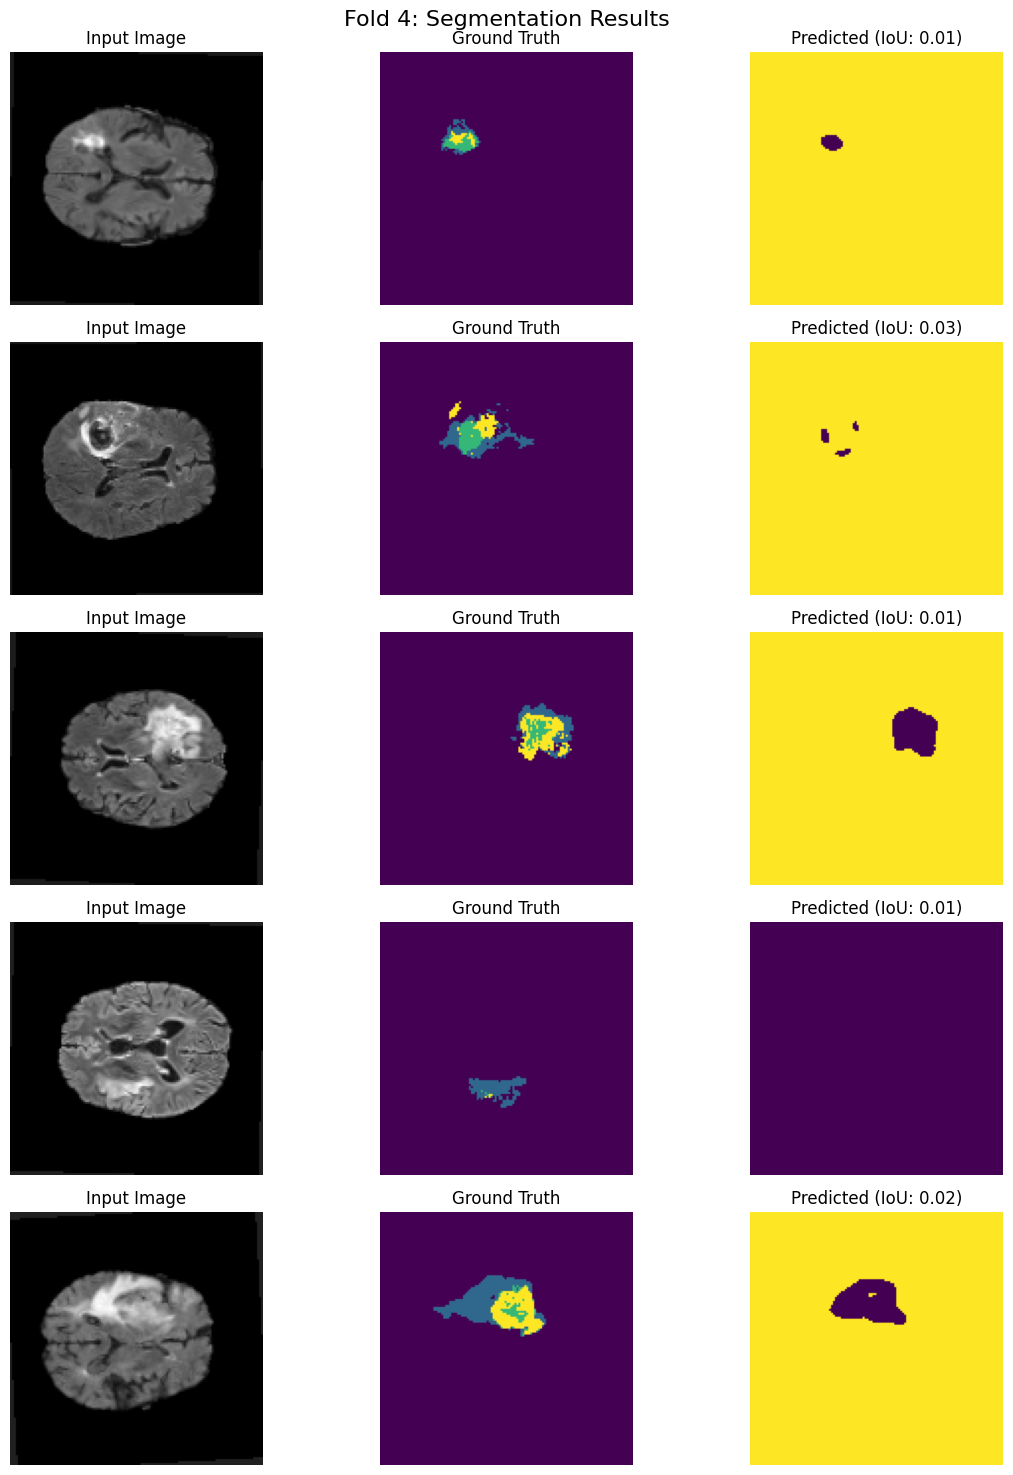


 Starting Fold 5/5
Training samples:388,Validation samples:96


Val Epoch 1/10: 100%|██████████| 20/20 [01:15<00:00,  3.78s/it]



Epoch [1/10] - Train Loss: 0.4661, Train DSC: 0.3974 | Val Loss: 0.1079, Val DSC: 0.4414


Val Epoch 2/10: 100%|██████████| 20/20 [01:15<00:00,  3.78s/it]



Epoch [2/10] - Train Loss: 0.0912, Train DSC: 0.4449 | Val Loss: 0.0761, Val DSC: 0.4895


Val Epoch 3/10: 100%|██████████| 20/20 [01:15<00:00,  3.78s/it]



Epoch [3/10] - Train Loss: 0.0724, Train DSC: 0.5072 | Val Loss: 0.0615, Val DSC: 0.5184


Val Epoch 4/10: 100%|██████████| 20/20 [01:15<00:00,  3.78s/it]



Epoch [4/10] - Train Loss: 0.0686, Train DSC: 0.5202 | Val Loss: 0.0592, Val DSC: 0.5269


Val Epoch 5/10: 100%|██████████| 20/20 [01:15<00:00,  3.78s/it]



Epoch [5/10] - Train Loss: 0.0599, Train DSC: 0.5318 | Val Loss: 0.0617, Val DSC: 0.5304
Saved checkpoint: checkpoints_brain_tumor/unet_epoch5.pth


Val Epoch 6/10: 100%|██████████| 20/20 [01:15<00:00,  3.78s/it]



Epoch [6/10] - Train Loss: 0.0597, Train DSC: 0.5360 | Val Loss: 0.0568, Val DSC: 0.5379


Val Epoch 7/10: 100%|██████████| 20/20 [01:15<00:00,  3.77s/it]



Epoch [7/10] - Train Loss: 0.0531, Train DSC: 0.5645 | Val Loss: 0.0477, Val DSC: 0.5620


Val Epoch 8/10: 100%|██████████| 20/20 [01:15<00:00,  3.77s/it]



Epoch [8/10] - Train Loss: 0.0536, Train DSC: 0.5843 | Val Loss: 0.0474, Val DSC: 0.5717


Val Epoch 9/10: 100%|██████████| 20/20 [01:15<00:00,  3.78s/it]



Epoch [9/10] - Train Loss: 0.0486, Train DSC: 0.6024 | Val Loss: 0.0612, Val DSC: 0.5375


Val Epoch 10/10: 100%|██████████| 20/20 [01:15<00:00,  3.77s/it]



Epoch [10/10] - Train Loss: 0.0484, Train DSC: 0.6042 | Val Loss: 0.0455, Val DSC: 0.5717
Saved checkpoint: checkpoints_brain_tumor/unet_epoch10.pth


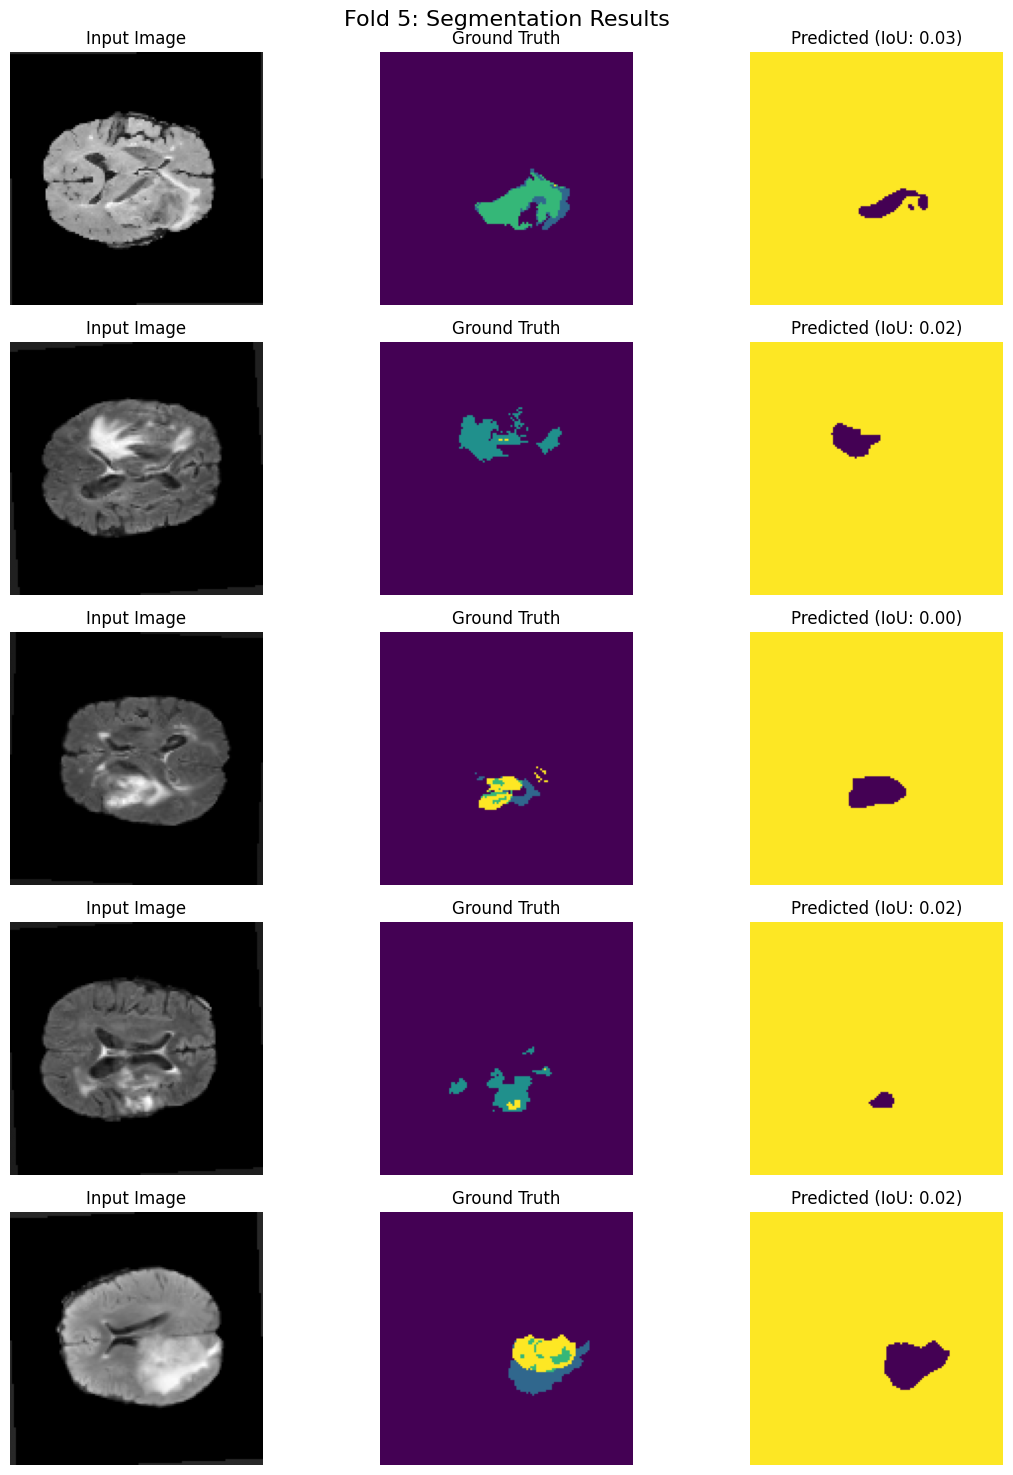

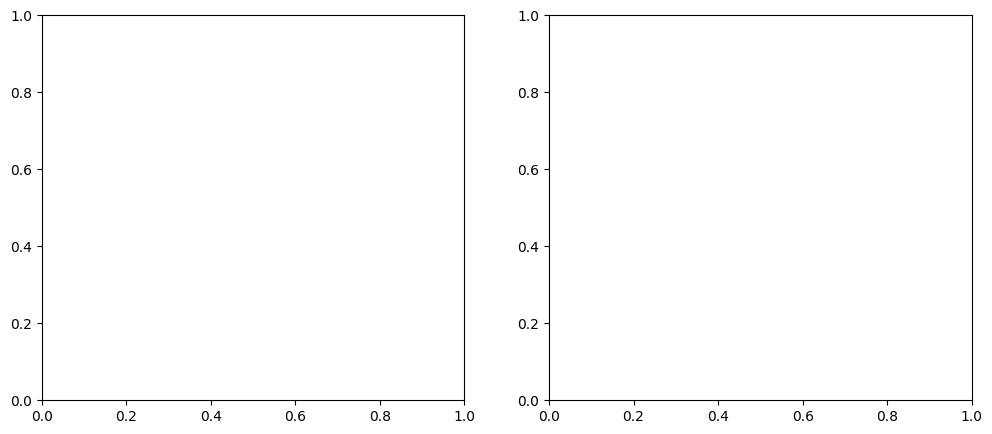

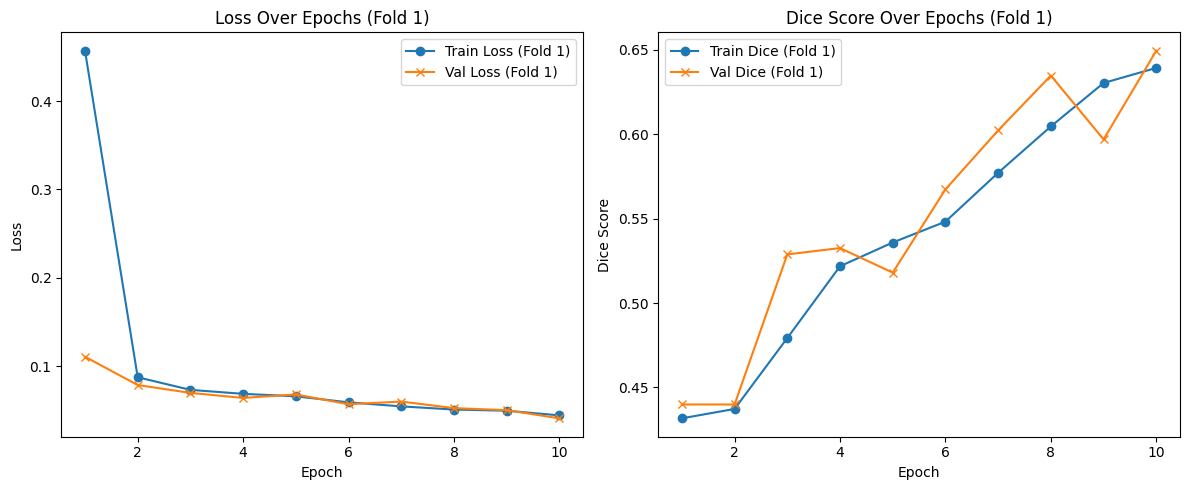

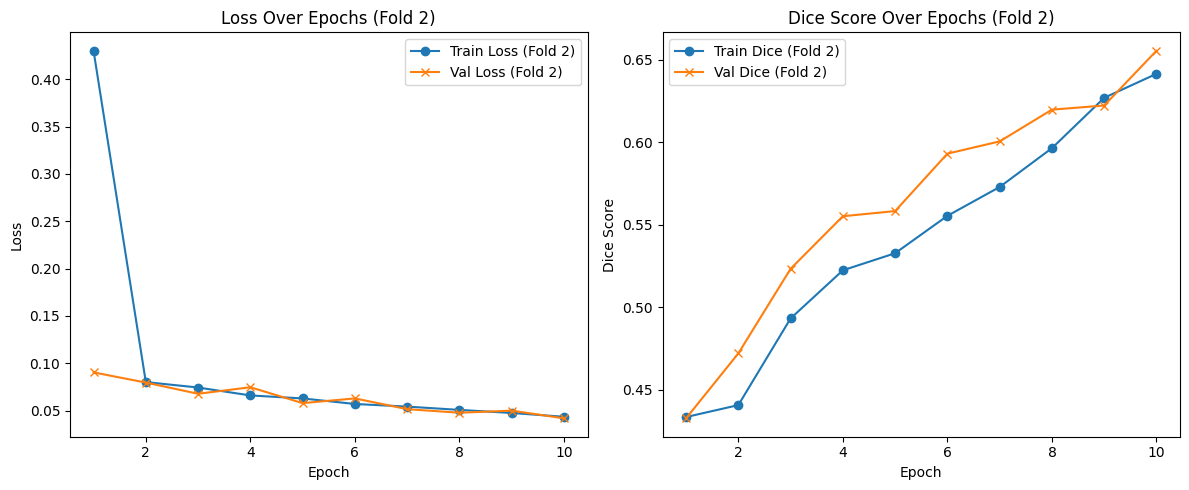

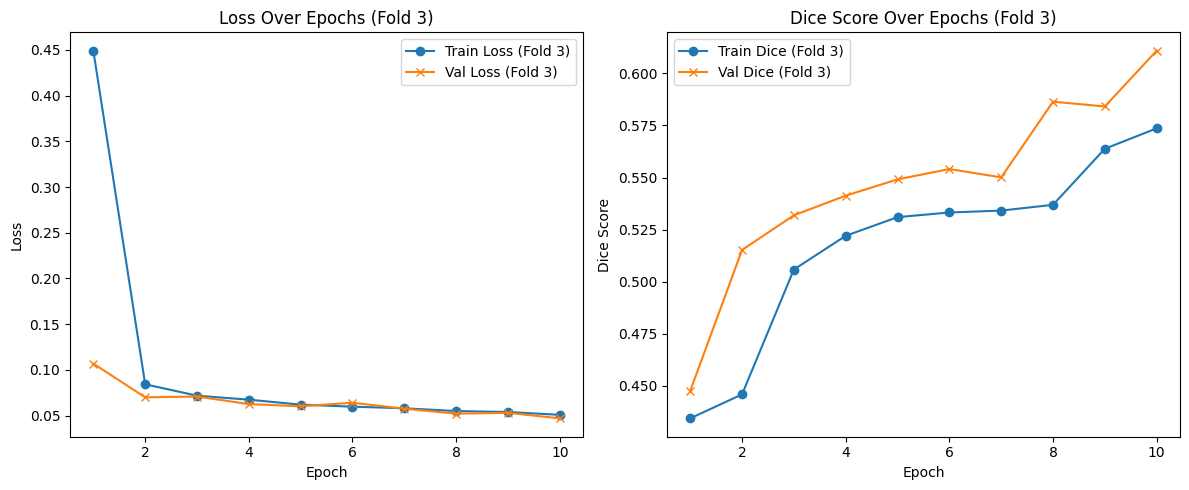

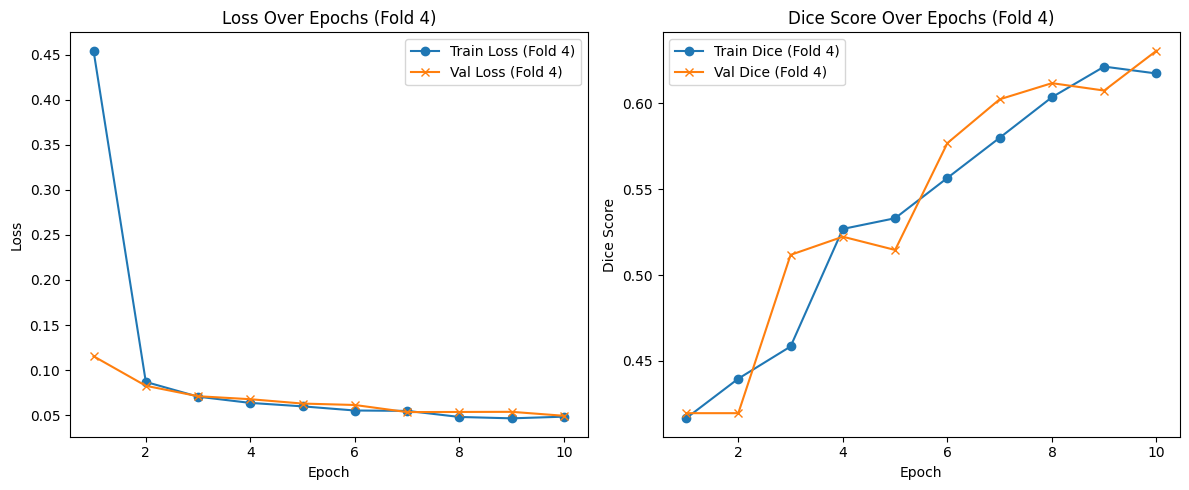

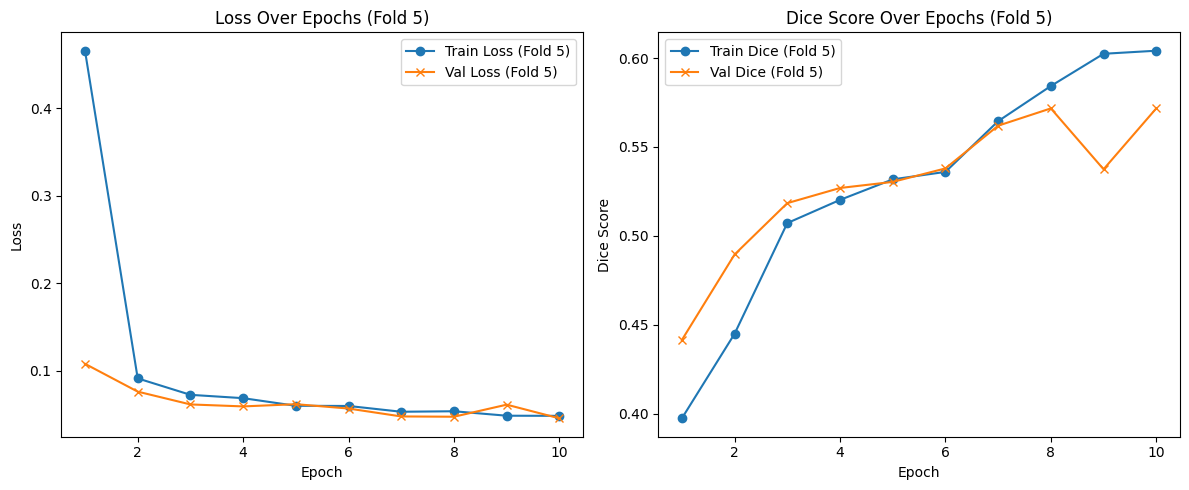

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader

if __name__ == "__main__":



    image_dir = "Task01_BrainTumour/imagesTr"
    label_dir = "Task01_BrainTumour/labelsTr"

    # Collect all file paths
    all_image_paths = sorted(glob.glob(os.path.join(image_dir, "*.nii.gz")))
    all_label_paths = sorted(glob.glob(os.path.join(label_dir, "*.nii.gz")))

    print(f"Total images found: {len(all_image_paths)}")
    print(f"Total labels found: {len(all_label_paths)}")

    assert len(all_image_paths) == len(all_label_paths), "Images and labels count do not match!"

    # Zip them together for consistent shuffling
    zipped_paths = list(zip(all_image_paths, all_label_paths))

    # Shuffle them to get a random subset
    random.shuffle(zipped_paths)

    kf = KFold(n_splits=5, shuffle=True, random_state=42)


    num_epochs = 10
    batch_size = 5
    checkpoint_dir = 'checkpoints_brain_tumor'


    if torch.cuda.is_available():
        device = torch.device("cuda")
        print(f"Using CUDA on {torch.cuda.get_device_name(0)}!")
    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        device = torch.device("mps")
        print("Using MPS on Apple Silicon!")
    else:
        device = torch.device("cpu")
        print("No GPU available, falling back to CPU.")


    all_histories = {"train_loss": [], "val_loss": [], "train_dice": [], "val_dice": []}

    for fold,(train_idx,val_idx) in enumerate (kf.split(zipped_paths)):
        print(f"\n Starting Fold {fold+1}/5")

        train_paths = [zipped_paths[i] for i in train_idx]
        val_paths = [zipped_paths[i] for i in val_idx]

        train_image_paths,train_mask_paths = zip(*train_paths)
        val_image_paths,val_mask_paths = zip(*val_paths)

        print(f"Training samples:{len(train_image_paths)},Validation samples:{len(val_image_paths)}")
        # Creating the datasets
        train_dataset = MedicalSegmentationDataset(train_image_paths, train_mask_paths, target_shape=(128, 128), slice_choice='middle')
        val_dataset = MedicalSegmentationDataset(val_image_paths, val_mask_paths, target_shape=(128, 128), slice_choice='middle')

        # Wrap them in DataLoaders
        train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True, pin_memory=True)
        val_loader = DataLoader(val_dataset, batch_size=5, shuffle=False, pin_memory=True)




        # Initialize model, optimizer, etc.
        model = UNet(in_channels=4, out_channels=4).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

        # start_epoch = load_checkpoint(model, optimizer, checkpoint_dir)
        # for epoch in range(start_epoch, num_epochs):
        # Train
        history = train_segmentation_model(
              model=model,
              train_loader=train_loader,
              val_loader=val_loader,
              optimizer=optimizer,
              device=device,
              num_epochs=num_epochs,
              checkpoint_dir='checkpoints_brain_tumor',
              checkpoint_freq=5
          )
        all_histories["train_loss"].append(history["train_loss"])
        all_histories["val_loss"].append(history["val_loss"])
        all_histories["train_dice"].append(history["train_dice"])
        all_histories["val_dice"].append(history["val_dice"])

        #visualize_segmentation for each epoch
        visualize_segmentation(model, val_loader, device, fold)

    # After training loop
    fig, (ax_loss, ax_dice) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Training Loss and Dice Score for Each Fold
    for fold_idx in range(5):
        # Extract fold-specific loss and dice scores
        train_loss = all_histories["train_loss"][fold_idx]
        val_loss = all_histories["val_loss"][fold_idx]
        train_dice = all_histories["train_dice"][fold_idx]
        val_dice = all_histories["val_dice"][fold_idx]

        # Create subplots for loss and dice score
        fig, (ax_loss, ax_dice) = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Loss for each fold
        ax_loss.plot(range(1, num_epochs+1), train_loss, label=f'Train Loss (Fold {fold_idx+1})', marker='o')
        ax_loss.plot(range(1, num_epochs+1), val_loss, label=f'Val Loss (Fold {fold_idx+1})', marker='x')
        ax_loss.set_title(f"Loss Over Epochs (Fold {fold_idx+1})")
        ax_loss.set_xlabel("Epoch")
        ax_loss.set_ylabel("Loss")
        ax_loss.legend()

        # Plot Dice Score for each fold
        ax_dice.plot(range(1, num_epochs+1), train_dice, label=f'Train Dice (Fold {fold_idx+1})', marker='o')
        ax_dice.plot(range(1, num_epochs+1), val_dice, label=f'Val Dice (Fold {fold_idx+1})', marker='x')
        ax_dice.set_title(f"Dice Score Over Epochs (Fold {fold_idx+1})")
        ax_dice.set_xlabel("Epoch")
        ax_dice.set_ylabel("Dice Score")
        ax_dice.legend()

        # Adjust layout and display
        plt.tight_layout()
        plt.show()






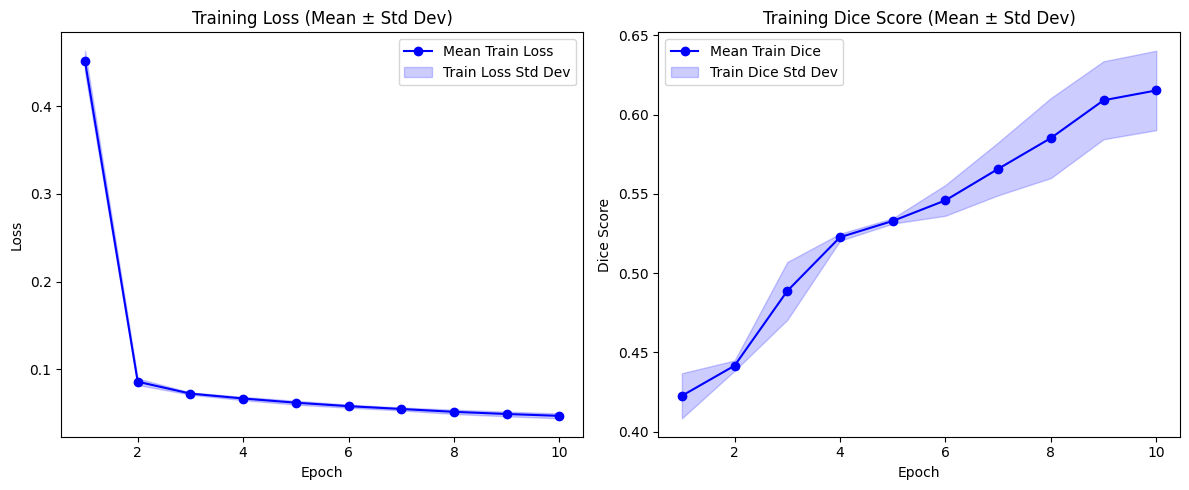

In [33]:
mean_train_loss = np.mean(all_histories['train_loss'],axis=0)
std_train_loss = np.std(all_histories['train_loss'],axis=0)
mean_train_dice = np.mean(all_histories['train_dice'],axis=0)
std_train_dice = np.std(all_histories['train_dice'],axis=0)


fig, (ax_loss, ax_dice) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss with Mean and Std Dev
epochs = range(1, len(mean_train_loss) + 1)
ax_loss.plot(epochs, mean_train_loss, label="Mean Train Loss", color="blue", marker="o")
ax_loss.fill_between(epochs,
                     mean_train_loss - std_train_loss,
                     mean_train_loss + std_train_loss,
                     color="blue", alpha=0.2, label="Train Loss Std Dev")

ax_loss.set_title("Training Loss (Mean ± Std Dev)")
ax_loss.set_xlabel("Epoch")
ax_loss.set_ylabel("Loss")
ax_loss.legend()

# Plot Dice Score with Mean and Std Dev
ax_dice.plot(epochs, mean_train_dice, label="Mean Train Dice", color="blue", marker="o")
ax_dice.fill_between(epochs,
                     mean_train_dice - std_train_dice,
                     mean_train_dice + std_train_dice,
                     color="blue", alpha=0.2, label="Train Dice Std Dev")

ax_dice.set_title("Training Dice Score (Mean ± Std Dev)")
ax_dice.set_xlabel("Epoch")
ax_dice.set_ylabel("Dice Score")
ax_dice.legend()


# Adjust layout and display
plt.tight_layout()
plt.show()